In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Define the neural network architecture
class DampedOscillatorPINN(nn.Module):
    def __init__(self):
        super(DampedOscillatorPINN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 50),
            nn.Tanh(),
            nn.Linear(50, 50),
            nn.Tanh(),
            nn.Linear(50, 1)
        )

    def forward(self, t):
        return self.net(t)

# Modified function to compute both loss and residuals
def compute_loss_and_residuals(model, t, omega_0, zeta):
    t.requires_grad = True
    x = model(t)
    dx_dt = torch.autograd.grad(x, t, torch.ones_like(x), create_graph=True)[0]
    d2x_dt2 = torch.autograd.grad(dx_dt, t, torch.ones_like(dx_dt), create_graph=True)[0]
    residuals = d2x_dt2 + 2*zeta*omega_0*dx_dt + omega_0**2*x
    loss = torch.mean(residuals**2)
    return loss, residuals

# Model, optimizer, and training loop setup
model = DampedOscillatorPINN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
omega_0 = 1.0  # Natural frequency
zeta = 0.1    # Damping ratio

# Initialization
losses = []
epoch_residuals = []

# Adjusted training loop
for epoch in range(5000):
    t = torch.rand(100, 1) * 10  # Generate random time points
    loss, residuals = compute_loss_and_residuals(model, t, omega_0, zeta)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:  # Adjust based on your preference for data collection frequency
        losses.append(loss.item())
        epoch_residuals.append(residuals.mean().item())  # Example: storing mean residual

# After training, plot the collected data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch_residuals, label='Mean Residual')
plt.xlabel('Epoch')
plt.ylabel('Mean Residual')
plt.title('Mean Residual Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


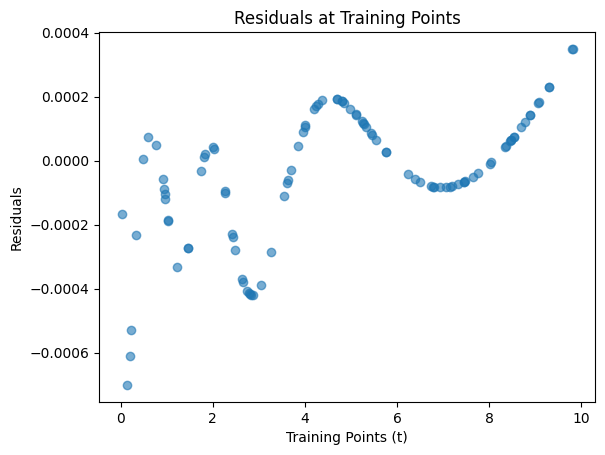

In [20]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Define the neural network architecture
class DampedOscillatorPINN(nn.Module):
    def __init__(self):
        super(DampedOscillatorPINN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 50),
            nn.Tanh(),
            nn.Linear(50, 50),
            nn.Tanh(),
            nn.Linear(50, 1)
        )

    def forward(self, t):
        return self.net(t)

# Modified function to compute both loss and residuals
def compute_loss_and_residuals(model, t, omega_0, zeta):
    t.requires_grad = True
    x = model(t)
    dx_dt = torch.autograd.grad(x, t, torch.ones_like(x), create_graph=True)[0]
    d2x_dt2 = torch.autograd.grad(dx_dt, t, torch.ones_like(dx_dt), create_graph=True)[0]
    residuals = d2x_dt2 + 2*zeta*omega_0*dx_dt + omega_0**2*x
    loss = torch.mean(residuals**2)
    return loss, residuals

# Model, optimizer, and training loop setup
model = DampedOscillatorPINN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
omega_0 = 1.0  # Natural frequency
zeta = 0.1    # Damping ratio


# Initialization for residuals collection
all_residuals = []
selected_epoch = 5000  # Example: Collecting residuals at the last epoch

for epoch in range(selected_epoch):
    t = torch.rand(100, 1) * 10  # Generate random time points within the domain
    optimizer.zero_grad()
    loss, residuals = compute_loss_and_residuals(model, t, omega_0, zeta)
    loss.backward()
    optimizer.step()
    
    if epoch == selected_epoch - 1:  # Collect residuals at the specified epoch
        all_residuals.append(residuals.detach().numpy())

# After training, plot the collected residuals for the specified epoch
# Assuming `t` still holds the training points used in the last epoch
plt.scatter(t.detach().numpy(), all_residuals[0], alpha=0.6)
plt.xlabel('Training Points (t)')
plt.ylabel('Residuals')
plt.title('Residuals at Training Points')
plt.show()



In [ ]:
# Assuming the rest of the model setup is as before

# Initialization for residuals collection
all_residuals = []
selected_epoch = 5000  # Example: Collecting residuals at the last epoch

for epoch in range(selected_epoch):
    t = torch.rand(100, 1) * 10  # Generate random time points within the domain
    optimizer.zero_grad()
    loss, residuals = compute_loss_and_residuals(model, t, omega_0, zeta)
    loss.backward()
    optimizer.step()
    
    if epoch == selected_epoch - 1:  # Collect residuals at the specified epoch
        all_residuals.append(residuals.detach().numpy())

# After training, plot the collected residuals for the specified epoch
# Assuming `t` still holds the training points used in the last epoch
plt.scatter(t.detach().numpy(), all_residuals[0], alpha=0.6)
plt.xlabel('Training Points (t)')
plt.ylabel('Residuals')
plt.title('Residuals at Training Points')
plt.show()


In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Assuming you have the weights and biases for the original network
# Replace these with your actual values
original_weights = {
    'hidden_layer1': torch.randn(8, 2),
    'hidden_layer2': torch.randn(8, 8),
    'output_layer': torch.randn(1, 8),
}

original_biases = {
    'hidden_layer1': torch.randn(8),
    'hidden_layer2': torch.randn(8),
    'output_layer': torch.randn(1),
}

# Define the architecture of the new network
new_input_size = 2
new_hidden_layers = [8, 8]
new_output_size = 1

# Create a new model with the same architecture as the original one
class NewModel(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size):
        super(NewModel, self).__init__()
        
        # Input layer
        self.input_layer = nn.Linear(input_size, hidden_layers[0])
        
        # Hidden layers with weights and biases from the original model
        self.hidden_layers = nn.ModuleList([
            nn.Linear(hidden_layers[i], hidden_layers[i+1]) for i in range(len(hidden_layers)-1)
        ])
        
        # Output layer
        self.output_layer = nn.Linear(hidden_layers[-1], output_size)

    def forward(self, x):
        x = torch.relu(self.input_layer(x))
        for layer in self.hidden_layers:
            x = torch.relu(layer(x))
        x = self.output_layer(x)
        return x

# Create an instance of the new model
new_model = NewModel(new_input_size, new_hidden_layers, new_output_size)

# Set the weights and biases from the original model
new_model.input_layer.weight.data = torch.transpose(original_weights['hidden_layer1'], 0, 1)
new_model.input_layer.bias.data = original_biases['hidden_layer1']

for i, layer in enumerate(new_model.hidden_layers):
    layer.weight.data = torch.transpose(original_weights[f'hidden_layer{i+2}'], 0, 1)
    layer.bias.data = original_biases[f'hidden_layer{i+2}']

new_model.output_layer.weight.data = torch.transpose(original_weights['output_layer'], 0, 1)
new_model.output_layer.bias.data = original_biases['output_layer']

# Visualize the differences in weights and biases
def visualize_difference(original, new, layer_name):
    plt.figure(figsize=(10, 4))
    
    # Plot weights
    plt.subplot(1, 2, 1)
    plt.title(f'{layer_name} Weights')
    plt.imshow(original, cmap='viridis')
    plt.colorbar(label='Weight Values')
    plt.xlabel('Neurons in Previous Layer')
    plt.ylabel('Neurons in Current Layer')

    plt.subplot(1, 2, 2)
    plt.title(f'Difference in {layer_name} Weights')
    plt.imshow(new - original, cmap='coolwarm')
    plt.colorbar(label='Weight Difference')
    plt.xlabel('Neurons in Previous Layer')
    plt.ylabel('Neurons in Current Layer')

    plt.tight_layout()
    plt.show()

# Visualize differences for each layer
for layer_name, original_weight in original_weights.items():
    new_weight = getattr(new_model, layer_name).weight.data
    visualize_difference(original_weight, new_weight, layer_name)

# Visualize differences for biases
for layer_name, original_bias in original_biases.items():
    new_bias = getattr(new_model, layer_name).bias.data
    visualize_difference(original_bias.unsqueeze(0), new_bias.unsqueeze(0), layer_name + ' Bias')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_weights(ax, weights, title):
    im = ax.imshow(weights, cmap='coolwarm', interpolation='none')

    # Add numbers to the cells
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            ax.text(j, i, f'{weights[i, j]:.2f}', color='white', ha='center', va='center')

    ax.set_title(title)
    return im

# Define the neural network architecture
layer_sizes = [2, 4, 8, 4, 1]

# Initialize random weights
np.random.seed(42)
weights = [np.random.randn(layer_sizes[i], layer_sizes[i+1]) for i in range(len(layer_sizes)-1)]

# Create a figure for visualization
fig, axes = plt.subplots(1, len(layer_sizes)-1, figsize=(15, 5))

# Plot the weights for each layer using a for-loop
for i, ax in enumerate(axes):
    im = plot_weights(ax, weights[i], f'Weights Layer {i+1}')

    # Show the colorbars
    fig.colorbar(im, ax=ax, orientation='horizontal')

# Show the plots
plt.show()


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def plot_weights(ax, weights, title):
    im = ax.imshow(weights, cmap='viridis', interpolation='none')

    # Add numbers to the cells
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            ax.text(j, i, f'{weights[i, j]:.2f}', color='white', ha='center', va='center')

    ax.set_title(title)
    return im

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Load weights from the model
state_dict = model.state_dict()

# Extract weights from state_dict
weights = [state_dict[key].numpy() for key in state_dict.keys()]

# Create a figure for visualization
fig, axes = plt.subplots(1, len(weights), figsize=(15, 5))

# Plot the weights for each layer using a for-loop
for i, ax in enumerate(axes):
    im = plot_weights(ax, weights[i], f'Weights Layer {i+1}')

    # Show the colorbars
    fig.colorbar(im, ax=ax, orientation='vertical')

# Show the plots
plt.show()

In [ ]:
weights

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def plot_weights(ax, weights, title):
    if len(weights.shape) == 1:
        # If the weights are 1D (possibly biases), reshape them to (1, len(weights))
        weights = weights.reshape(1, -1)
    im = ax.imshow(weights, cmap='viridis', interpolation='none')

    # Add numbers to the cells
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            ax.text(j, i, f'{weights[i, j]:.2f}', color='black', ha='center', va='center')

    ax.set_title(title)
    return im

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Load weights from the model
state_dict = model.state_dict()

# Extract weights from state_dict
weights = [state_dict[key].numpy() for key in state_dict.keys()]

# Create a figure for visualization
fig, axes = plt.subplots(1, len(weights), figsize=(15, 5))

# Plot the weights for each layer using a for-loop
for i, ax in enumerate(axes):
    im = plot_weights(ax, weights[i], f'Weights Layer {i+1}')

    # Show the colorbars
    fig.colorbar(im, ax=ax, orientation='horizontal')

# Show the plots
plt.show()


In [ ]:
type(weights)

In [ ]:
weights.shape

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def plot_weights(ax, weights, title):
    if len(weights.shape) == 1:
        # If the weights are 1D (possibly biases), reshape them to (1, len(weights))
        weights = weights.reshape(1, -1)
    im = ax.imshow(weights, cmap='viridis', interpolation='none')

    # Add numbers to the cells
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            ax.text(j, i, f'{weights[i, j]:.2f}', color='white', ha='center', va='center')

    ax.set_title(title)
    return im

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Load weights and biases from the model
state_dict = model.state_dict()

# Extract weights and biases from state_dict
weights = [state_dict[key].numpy() for key in state_dict.keys()]

# Create a figure for visualization
fig, axes = plt.subplots(1, len(weights), figsize=(15, 5))

# Plot the weights and biases for each layer using a for-loop
for i, ax in enumerate(axes):
    im = plot_weights(ax, weights[i], f'Layer {i+1}')

    # Show the colorbars
    #fig.colorbar(im, ax=ax, orientation='vertical')

# Show the plots
plt.show()


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def plot_weights(ax, weights, title, labels):
    if len(weights.shape) == 1:
        # If the weights are 1D (possibly biases), reshape them to (1, len(weights))
        weights = weights.reshape(1, -1)
    im = ax.imshow(weights, cmap='viridis', interpolation='none')

    # Add numbers and labels to the cells
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            ax.text(j, i, f'{weights[i, j]:.2f}\n{labels[i, j]}', color='white', ha='center', va='center')

    ax.set_title(title)
    return im

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Load weights and biases from the model
state_dict = model.state_dict()

# Extract weights and biases from state_dict
weights = [state_dict[key].numpy() for key in state_dict.keys()]

# Create labels to indicate weights or biases
labels = np.array([['Weight' if 'weight' in key else 'Bias' for key in state_dict.keys()]])

# Create a figure for visualization
fig, axes = plt.subplots(1, len(weights), figsize=(15, 5))

# Plot the weights and biases for each layer using a for-loop
for i, ax in enumerate(axes):
    im = plot_weights(ax, weights[i], f'Layer {i+1}', labels)

    # Show the colorbars
    fig.colorbar(im, ax=ax, orientation='vertical')

# Show the plots
plt.show()


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def plot_weights(ax, weights, title, labels):
    if len(weights.shape) == 1:
        # If the weights are 1D (possibly biases), reshape them to (1, len(weights))
        weights = weights.reshape(1, -1)
    im = ax.imshow(weights, cmap='viridis', interpolation='none')

    # Add numbers and labels to the cells
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            ax.text(j, i, f'{weights[i, j]:.2f}\n{labels[i, j]}', color='white', ha='center', va='center')

    ax.set_title(title)
    return im

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Load weights and biases from the model
state_dict = model.state_dict()

# Extract weights and biases from state_dict
weights = [state_dict[key].numpy() for key in state_dict.keys()]

# Create labels to indicate weights or biases
labels = np.array([['Weight' if 'weight' in key else 'Bias' for key in state_dict.keys()]])  # Note the extra square brackets

# Create a figure for visualization
fig, axes = plt.subplots(1, len(weights), figsize=(15, 5))

# Plot the weights and biases for each layer using a for-loop
for i, ax in enumerate(axes):
    im = plot_weights(ax, weights[i], f'Layer {i+1}', labels)

    # Show the colorbars
    fig.colorbar(im, ax=ax, orientation='vertical')

# Show the plots
plt.show()


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def plot_weights(ax, weights, title, labels):
    if len(weights.shape) == 1:
        # If the weights are 1D (possibly biases), reshape them to (1, len(weights))
        weights = weights.reshape(1, -1)
    im = ax.imshow(weights, cmap='viridis', interpolation='none')

    # Add numbers and labels to the cells
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            ax.text(j, i, f'{weights[i, j]:.2f}\n{labels[i, j]}', color='white', ha='center', va='center')

    ax.set_title(title)
    return im

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Load weights and biases from the model
state_dict = model.state_dict()

# Extract weights and biases from state_dict
weights = [state_dict[key].numpy() for key in state_dict.keys()]

# Create labels to indicate weights or biases
labels = np.array([['Weight' if 'weight' in key else 'Bias' for key in state_dict.keys()]])

# Create a figure for visualization
fig, axes = plt.subplots(1, len(weights), figsize=(15, 5))

# Plot the weights and biases for each layer using a for-loop
for i, ax in enumerate(axes):
    im = plot_weights(ax, weights[i], f'Layer {i+1}', labels)

    # Show the colorbars
    fig.colorbar(im, ax=ax, orientation='vertical')

# Show the plots
plt.show()


In [ ]:
state_dict

In [ ]:
labels

In [ ]:
import torch
import torch.nn as nn
import torch.nn.init as init
import matplotlib.pyplot as plt

# Define the architecture of the original network
original_input_size = 2
original_hidden_layers = [8, 8]
original_output_size = 1

# Create the original model with Xavier initialization
class OriginalModel(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size):
        super(OriginalModel, self).__init__()
        
        # Input layer
        self.input_layer = nn.Linear(input_size, hidden_layers[0])
        init.xavier_uniform_(self.input_layer.weight.data, gain=nn.init.calculate_gain('relu'))
        init.zeros_(self.input_layer.bias.data)
        
        # Hidden layers with Xavier initialization
        self.hidden_layers = nn.ModuleList([
            nn.Linear(hidden_layers[i], hidden_layers[i+1]) for i in range(len(hidden_layers)-1)
        ])
        for layer in self.hidden_layers:
            init.xavier_uniform_(layer.weight.data, gain=nn.init.calculate_gain('relu'))
            init.zeros_(layer.bias.data)
        
        # Output layer with Xavier initialization
        self.output_layer = nn.Linear(hidden_layers[-1], output_size)
        init.xavier_uniform_(self.output_layer.weight.data, gain=nn.init.calculate_gain('linear'))
        init.zeros_(self.output_layer.bias.data)

    def forward(self, x):
        x = torch.relu(self.input_layer(x))
        for layer in self.hidden_layers:
            x = torch.relu(layer(x))
        x = self.output_layer(x)
        return x

# Create an instance of the original model
original_model = OriginalModel(original_input_size, original_hidden_layers, original_output_size)

# Define the architecture of the new network with increased neurons
new_input_size = 2
new_hidden_layers = [16, 16]  # Increase the number of neurons
new_output_size = 1

# Create a new model with the same architecture as the original one
class NewModel(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size):
        super(NewModel, self).__init__()
        
        # Input layer
        self.input_layer = nn.Linear(input_size, hidden_layers[0])
        
        # Hidden layers with weights and biases from the original model
        self.hidden_layers = nn.ModuleList([
            nn.Linear(hidden_layers[i], hidden_layers[i+1]) for i in range(len(hidden_layers)-1)
        ])
        
        # Output layer
        self.output_layer = nn.Linear(hidden_layers[-1], output_size)

    def forward(self, x):
        x = torch.relu(self.input_layer(x))
        for layer in self.hidden_layers:
            x = torch.relu(layer(x))
        x = self.output_layer(x)
        return x

# Create an instance of the new model
new_model = NewModel(new_input_size, new_hidden_layers, new_output_size)

# Set the weights from the original model using He initialization
def initialize_weights_he(model):
    for layer in model.modules():
        if isinstance(layer, nn.Linear):
            init.kaiming_uniform_(layer.weight.data, mode='fan_in', nonlinearity='relu')
            init.zeros_(layer.bias.data)

# Initialize weights of the new model using He initialization
initialize_weights_he(new_model)

# Visualize the differences in weights and biases
def visualize_difference(original, new, layer_name):
    plt.figure(figsize=(10, 4))
    
    # Plot weights
    plt.subplot(1, 2, 1)
    plt.title(f'{layer_name} Weights')
    plt.imshow(original, cmap='viridis')
    plt.colorbar(label='Weight Values')
    plt.xlabel('Neurons in Previous Layer')
    plt.ylabel('Neurons in Current Layer')

    plt.subplot(1, 2, 2)
    plt.title(f'Difference in {layer_name} Weights')
    plt.imshow(new - original, cmap='coolwarm')
    plt.colorbar(label='Weight Difference')
    plt.xlabel('Neurons in Previous Layer')
    plt.ylabel('Neurons in Current Layer')

    plt.tight_layout()
    plt.show()

# Visualize differences for each layer
for layer_name, original_weight in original_model.state_dict().items():
    new_weight = new_model.state_dict()[layer_name]
    visualize_difference(original_weight, new_weight, layer_name)

# Visualize differences for biases
for layer_name, original_bias in original_model.state_dict().items():
    if 'bias' in layer_name:
        new_bias = new_model.state_dict()[layer_name]
        visualize_difference(original_bias.unsqueeze(0), new_bias.unsqueeze(0), layer_name + ' Bias')


# ADAPTIVE SCHEME II

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the original model
class OriginalModel(nn.Module):
    def __init__(self):
        super(OriginalModel, self).__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 4)
        self.output = nn.Linear(4, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.output(x)
        return x

# Train and save the original model
original_model = OriginalModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(original_model.parameters(), lr=0.01)

# Dummy data for training
input_data = torch.rand((100, 2))
target_data = torch.rand((100, 1))

original_weights = []  # List to store original model weights

for epoch in range(100):
    optimizer.zero_grad()
    output = original_model(input_data)
    loss = criterion(output, target_data)
    loss.backward()
    optimizer.step()

    # Store the weights for visualization
    original_weights.append(original_model.fc1.weight.data.numpy().flatten())

# Save the weights and biases
torch.save(original_model.state_dict(), 'original_model.pth')

# Define the new model with an additional hidden layer
class NewModel(nn.Module):
    def __init__(self):
        super(NewModel, self).__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 4)
        self.new_layer = nn.Linear(4, 4)  # Additional hidden layer
        self.output = nn.Linear(4, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.new_layer(x))
        x = self.output(x)
        return x

# Initialize the new model with the weights and biases of the original model
new_model = NewModel()
new_model.load_state_dict(torch.load('original_model.pth'))

# Check the weights of the new model
new_weights = []
for epoch in range(10):  # Only for visualization, you can further train as needed
    # Store the weights for visualization
    new_weights.append(new_model.fc1.weight.data.numpy().flatten())

# Plotting the weights
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(original_weights)
plt.title('Original Model Weights')
plt.xlabel('Epoch')
plt.ylabel('Weight Values')

plt.subplot(1, 2, 2)
plt.plot(new_weights)
plt.title('New Model Weights (Initialized from Original)')
plt.xlabel('Epoch')
plt.ylabel('Weight Values')

plt.tight_layout()
plt.show()


# Initialization and activation function

In [ ]:
import torch.nn as nn
import torch.nn.init as init

class FCN(nn.Module):
    def __init__(self, input_size, output_size, hidden_sizes, activation='relu', initialization='xavier'):
        super(FCN, self).__init__()

        # Define input and output layers
        self.input_layer = nn.Linear(input_size, hidden_sizes[0])
        self.output_layer = nn.Linear(hidden_sizes[-1], output_size)

        # Define hidden layers
        self.hidden_layers = nn.ModuleList([
            nn.Linear(in_size, out_size) for in_size, out_size in zip(hidden_sizes[:-1], hidden_sizes[1:])
        ])

        # Define ModuleDict for activation functions
        self.activations = nn.ModuleDict({
            'relu': nn.ReLU(),
            'tanh': nn.Tanh(),
        })

        # Initialize layers
        self.init_weights(initialization)

        # Set activation function
        if activation not in self.activations:
            raise ValueError("Unsupported activation function")
        self.activation = self.activations[activation]

    def forward(self, x):
        x = self.input_layer(x)

        for hidden_layer in self.hidden_layers:
            x = self.activation(hidden_layer(x))

        x = self.output_layer(x)
        return x

    def init_weights(self, initialization):
        # Initialize input layer
        if initialization == 'xavier':
            init.xavier_uniform_(self.input_layer.weight)
        elif initialization == 'kaiming':
            init.kaiming_uniform_(self.input_layer.weight, nonlinearity='relu')
        elif initialization == 'zeros':
            init.zeros_(self.input_layer.weight)
        else:
            raise ValueError("Unsupported initialization type")

        # Initialize hidden layers
        for hidden_layer in self.hidden_layers:
            if initialization == 'xavier':
                init.xavier_uniform_(hidden_layer.weight)
            elif initialization == 'kaiming':
                init.kaiming_uniform_(hidden_layer.weight, nonlinearity='relu')
            elif initialization == 'zeros':
                init.zeros_(hidden_layer.weight)
            else:
                raise ValueError("Unsupported initialization type")

        # Initialize output layer
        if initialization == 'xavier':
            init.xavier_uniform_(self.output_layer.weight)
        elif initialization == 'kaiming':
            init.kaiming_uniform_(self.output_layer.weight, nonlinearity='relu')
        elif initialization == 'zeros':
            init.zeros_(self.output_layer.weight)
        else:
            raise ValueError("Unsupported initialization type")

# Example usage:
input_size = 10
output_size = 5
hidden_sizes = [20, 30, 15, 10, 25]  # You can specify any number of neurons in each hidden layer

# Create an instance of FCN with ReLU activation and Xavier initialization
model = FCN(input_size, output_size, hidden_sizes, activation='relu', initialization='xavier')

# Check the model architecture
print(model)


## Visualization of the weights and biases

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def plot_weights(ax, weights, title):
    if len(weights.shape) == 1:
        # If the weights are 1D (possibly biases), reshape them to (1, len(weights))
        weights = weights.reshape(1, -1)
    im = ax.imshow(weights, cmap='viridis', interpolation='none')

    # Add numbers to the cells
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            ax.text(j, i, f'{weights[i, j]:.2f}', color='white', ha='center', va='center')

    ax.set_title(title)
    return im

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Load weights and biases from the model
state_dict = model.state_dict()

# Extract weights and biases from state_dict
weights = [state_dict[key].numpy() for key in state_dict.keys()]

# Create a figure for visualization
fig, axes = plt.subplots(1, len(weights), figsize=(15, 5))

# Plot the weights and biases for each layer using a for-loop
for i, ax in enumerate(axes):
    im = plot_weights(ax, weights[i], f'Layer {i+1}')

    # Show the colorbars
    #fig.colorbar(im, ax=ax, orientation='vertical')

# Show the plots
plt.show()

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def plot_weights(ax, weights, title):
    if len(weights.shape) == 1:
        # If the weights are 1D (possibly biases), reshape them to (1, len(weights))
        weights = weights.reshape(1, -1)
    im = ax.imshow(weights, cmap='viridis', interpolation='none')

    # Add numbers to the cells
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            ax.text(j, i, f'{weights[i, j]:.2f}', color='white', ha='center', va='center')

    ax.set_title(title)

    return im

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Load weights and biases from the model
state_dict = model.state_dict()

# Filter out keys containing "bias"
weights_dict = {key: value for key, value in state_dict.items() if 'bias' not in key}

# Create a figure for visualization
fig, axes = plt.subplots(1, len(weights_dict), figsize=(15, 5))

# Plot the weights for each layer using a for-loop
for i, (key, weights) in enumerate(weights_dict.items()):
    im = plot_weights(axes[i], weights.numpy(), f'{key}')

# Show the plots
plt.show()


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def plot_weights(ax, weights, title):
    if len(weights.shape) == 1:
        # If the weights are 1D (possibly biases), reshape them to (1, len(weights))
        weights = weights.reshape(1, -1)
    im = ax.imshow(weights, cmap='viridis', interpolation='none')

    # Add numbers to the cells
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            ax.text(j, i, f'{weights[i, j]:.2f}', color='white', ha='center', va='center')

    ax.set_title(title)
    return im

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Load weights and biases from the model
state_dict = model.state_dict()

# Combine both dictionaries for weights and biases into a single dictionary
weights_biases_dict = {key: value for key, value in state_dict.items()}

# Create a figure for visualization
fig, axes = plt.subplots(1, len(weights_biases_dict), figsize=(15, 5))

# Plot the weights and biases for each layer
for i, (key, data) in enumerate(weights_biases_dict.items()):
    if 'bias' in key:
        im = plot_weights(axes[i], data.numpy().reshape(-1, 1), f'{key} (Biases)')
    elif 'weight' in key:
        im = plot_weights(axes[i], data.numpy(), f'{key} (Weights)')
# Add a colorbar for all the plots
divider = make_axes_locatable(axes[-3])
cax = divider.append_axes("bottom", size="5%", pad=0.5)
cbar = plt.colorbar(im, cax=cax, orientation='horizontal')
cbar.set_label('Value')
# Show the plots
plt.show()


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def plot_weights(ax, weights, title):
    if len(weights.shape) == 1:
        # If the weights are 1D (possibly biases), reshape them to (1, len(weights))
        weights = weights.reshape(1, -1)
    im = ax.imshow(weights, cmap='viridis', interpolation='none')

    # Add numbers to the cells
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            ax.text(j, i, f'{weights[i, j]:.2f}', color='white', ha='center', va='center')

    ax.set_title(title)
    return im

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Load weights and biases from the model
state_dict = model.state_dict()

# Combine both dictionaries for weights and biases into a single dictionary
weights_biases_dict = {key: value for key, value in state_dict.items()}

# Create a figure for visualization
fig, axes = plt.subplots(1, len(weights_biases_dict), figsize=(15, 5))

# Plot the weights and biases for each layer
max_intensity = 0  # Track the maximum intensity across all plots
for i, (key, data) in enumerate(weights_biases_dict.items()):
    if 'bias' in key:
        im = plot_weights(axes[i], data.numpy().reshape(-1, 1), f'{key} (Biases)')
    elif 'weight' in key:
        im = plot_weights(axes[i], data.numpy(), f'{key} (Weights)')
    
    max_intensity = max(max_intensity, np.max(np.abs(data.numpy())))  # Update max intensity

# Add a colorbar below all the plots
divider = make_axes_locatable(axes[-1])
cax = divider.append_axes("bottom", size="10%", pad=0.5)
cbar = plt.colorbar(im, cax=cax, orientation='horizontal')
cbar.set_label('Value')

# Normalize the color bar based on the maximum intensity across all plots
cbar.set_clim(-max_intensity, max_intensity)

# Show the plots
plt.show()


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def plot_weights(self):
        state_dict = self.state_dict()
        weights_biases_dict = {key: value for key, value in state_dict.items()}
        
        # Create a figure for visualization
        num_plots = len(weights_biases_dict)
        fig, axes = plt.subplots(1, num_plots, figsize=(5*num_plots, 5))

        # Plot the weights and biases for each layer
        #max_intensity = 0  # Track the maximum intensity across all plots
        for i, (key, data) in enumerate(weights_biases_dict.items()):
            ax = axes[i] if num_plots > 1 else axes
            if 'bias' in key:
                title = f'{key} (Biases)'
            elif 'weight' in key:
                title = f'{key} (Weights)'
                
            if len(data.shape) == 1:
                # If the data is 1D (possibly biases), reshape them to (1, len(data))
                data = data.reshape(1, -1)
                
            im = ax.imshow(data.numpy(), cmap='viridis', interpolation='none')

            # Add numbers to the cells
            for i in range(data.shape[0]):
                for j in range(data.shape[1]):
                    ax.text(j, i, f'{data[i, j]:.2f}', color='white', ha='center', va='center')

            ax.set_title(title)
            #max_intensity = max(max_intensity, np.max(np.abs(data.numpy())))  # Update max intensity

        # Add a colorbar below all the plots
        #divider = make_axes_locatable(ax)
        #cax = divider.append_axes("bottom", size="5%", pad=0.5)
        #cbar = plt.colorbar(im, cax=cax, orientation='horizontal')
        #cbar.set_label('Value')

        # Normalize the color bar based on the maximum intensity across all plots
        #cbar.set_clim(-max_intensity, max_intensity)

        # Show the plots
        plt.show()

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Call the plot_weights method
model.plot_weights()


In [ ]:
import torch
import torch.nn as nn
import torch.nn.init as init
import matplotlib.pyplot as plt

class FCN(nn.Module):
    def __init__(self, N_INPUT, N_OUTPUT, hidden_layers, activation='Tanh', initialization='He'):
        super().__init__()

        self.activation_functions = nn.ModuleDict([
            ["Tanh", nn.Tanh()],
            ["ReLU", nn.ReLU()],
            ["LeakyReLU", nn.LeakyReLU()],
            ["Sigmoid", nn.Sigmoid()],
            ["Softmax", nn.Softmax(dim=-1)],
        ])

        if activation not in self.activation_functions:
            raise ValueError("Unsupported activation function")

        self.activation = self.activation_functions[activation]

        self.fcs = nn.Sequential(
            nn.Linear(N_INPUT, hidden_layers[0]),
            self.activation
        )

        self.fch = nn.ModuleList([
            nn.Sequential(
                nn.Linear(hidden_layers[i], hidden_layers[i + 1]),
                self.activation
            ) for i in range(len(hidden_layers) - 1)
        ])

        self.fce = nn.Linear(hidden_layers[-1], N_OUTPUT)

        self.initialize_parameters(initialization)


    def forward(self, x):
        x = self.fcs(x)
        for layer in self.fch:
            x = self.activation(layer(x))
        x = self.fce(x)
        return x
    
    def initialize_parameters(self, initialization):
        for module in self.modules():
            if isinstance(module, nn.Linear):
                if initialization == 'Uniform':
                    init.uniform_(module.weight.data, -0.1, 0.1)
                    init.zeros_(module.bias.data)
                elif initialization == 'Normal':
                    init.normal_(module.weight.data, mean=0, std=0.01)
                    init.zeros_(module.bias.data)
                elif initialization == 'Xavier':
                    init.xavier_uniform_(module.weight.data)
                    init.zeros_(module.bias.data)
                elif initialization == 'He':
                    init.kaiming_uniform_(module.weight.data, mode='fan_in', nonlinearity='relu')
                    init.zeros_(module.bias.data)
                elif initialization == 'Orthogonal':
                    init.orthogonal_(module.weight.data)
                    init.zeros_(module.bias.data)
                elif initialization == 'Kaiming':
                    init.kaiming_uniform_(module.weight.data, mode='fan_in', nonlinearity='leaky_relu')
                    init.zeros_(module.bias.data)
                else:
                    raise ValueError("Unsupported initialization type")

    def plot_weights(self):
        state_dict = self.state_dict()
        weights_biases_dict = {key: value for key, value in state_dict.items()}
        
        # Create a figure for visualization
        num_subplots = len(weights_biases_dict)
        num_cols = 2
        num_rows = (num_subplots + num_cols -1) // num_cols
        #fig, axes = plt.subplots(1, num_plots, figsize=(5*num_plots, 5))
        fig, axes = plt.subplots(num_rows,
                                 ncols, 
                                 figsize=(5*num_plots, 5)
                                )

        # Plot the weights and biases for each layer
        #max_intensity = 0  # Track the maximum intensity across all plots
        for i, (key, data) in enumerate(weights_biases_dict.items()):
            ax = axes[i] if num_plots > 1 else axes
            if 'bias' in key:
                title = f'{key} (Biases)'
            elif 'weight' in key:
                title = f'{key} (Weights)'
                
            if len(data.shape) == 1:
                # If the data is 1D (possibly biases), reshape them to (1, len(data))
                data = data.reshape(1, -1)
                
            im = ax.imshow(data.numpy(), cmap='viridis', interpolation='none')

            # Add numbers to the cells
            for i in range(data.shape[0]):
                for j in range(data.shape[1]):
                    ax.text(j, i, f'{data[i, j]:.2f}', color='white', ha='center', va='center')

            ax.set_title(title)
            #max_intensity = max(max_intensity, np.max(np.abs(data.numpy())))  # Update max intensity

        # Add a colorbar below all the plots
        #divider = make_axes_locatable(ax)
        #cax = divider.append_axes("bottom", size="5%", pad=0.5)
        #cbar = plt.colorbar(im, cax=cax, orientation='horizontal')
        #cbar.set_label('Value')

        # Normalize the color bar based on the maximum intensity across all plots
        #cbar.set_clim(-max_intensity, max_intensity)

        # Show the plots
        plt.show()

    def visualize_difference(self, original, new, layer_name):
        plt.figure(figsize=(10, 4))

        # Plot weights
        plt.subplot(1, 2, 1)
        plt.title(f'{layer_name} Weights')
        plt.imshow(original, cmap='viridis')
        plt.colorbar(label='Weight Values')
        plt.xlabel('Neurons in Previous Layer')
        plt.ylabel('Neurons in Current Layer')

        plt.subplot(1, 2, 2)
        plt.title(f'Difference in {layer_name} Weights')
        plt.imshow(new - original, cmap='coolwarm')
        plt.colorbar(label='Weight Difference')
        plt.xlabel('Neurons in Previous Layer')
        plt.ylabel('Neurons in Current Layer')

        plt.tight_layout()
        plt.show()

# Step 1: Create the original model
original_input_size = 2
original_hidden_layers = [8, 8]
original_output_size = 1
original_model = FCN(original_input_size, original_output_size, original_hidden_layers, activation='Tanh', initialization='He')
original_model.plot_weights()



In [ ]:
# Plot each tensor using Matplotlib
for idx, (key, tensor) in enumerate(tensor_dict.items()):
    row = idx // num_cols
    col = idx % num_cols
    axs[row, col].imshow(tensor, cmap='gray')  # Adjust colormap as needed
    axs[row, col].set_title(key)
    axs[row, col].axis('off')  # Turn off axis
    axs[row, col].set_aspect('auto')  # Set aspect ratio to auto
# Plot data in each subplot
for i, ax in enumerate(axs.flat):
    if i < num_subplots:
        ax.plot(x, y)
        ax.set_title(f"Subplot {i+1}")
    else:
        ax.axis('off')  # Hide extra subplots
# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
state_dict = original_model.state_dict()
weights_biases_dict = {key: value for key, value in state_dict.items()}
type(weights_biases_dict['fcs.0.weight'].numpy())

In [ ]:
# Create a figure for visualization
num_plots = len(weights_biases_dict)
#fig, axes = plt.subplots(1, num_plots, figsize=(5*num_plots, 5))
fig, axes = plt.subplots(nrows = (num_plots +1)//2,
                                 ncols = 2, 
                                 figsize=(5*num_plots, 5)
                                )

In [ ]:

# Step 2: Visualize the weights and biases of the original model
for layer_name, param in original_model.named_parameters():
    original_weight = param.detach().numpy()
    original_model.visualize_difference(original_weight, original_weight, layer_name)

# Step 3: Create the extended model with 16 neurons in hidden layers and ReLU activation
extended_hidden_layers = [16, 16]
extended_model = FCN(original_input_size, original_output_size, extended_hidden_layers, activation='ReLU', initialization='He')

# Step 4: Visualize the weights and biases of the extended model
for layer_name, param in extended_model.named_parameters():
    extended_weight = param.detach().numpy()
    extended_model.visualize_difference(extended_weight, extended_weight, layer_name)

# Step 5: Overwrite the weights and biases of the extended model with the original model
for original_param, extended_param in zip(original_model.parameters(), extended_model.parameters()):
    extended_param.data.copy_(original_param.data)

# Step 6: Visualize the weights and biases of the extended model after overwriting
for layer_name, param in extended_model.named_parameters():
    extended_weight = param.detach().numpy()
    extended_model.visualize_difference(original_weight, extended_weight, layer_name)

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def plot_weights(self):
        state_dict = self.state_dict()
        
        num_plots = len(state_dict)
        fig, axes = plt.subplots(1, num_plots, figsize=(5*num_plots, 5))

        max_intensity = 0  
        for i, (key, data) in enumerate(state_dict.items()):
            ax = axes[i] if num_plots > 1 else axes
            title = f'{key} (Biases)' if 'bias' in key else f'{key} (Weights)'
            
            if len(data.shape) == 1:
                data = data.reshape(1, -1)
                
            im = ax.imshow(data.numpy(), cmap='viridis', interpolation='none')

            for i in range(data.shape[0]):
                for j in range(data.shape[1]):
                    ax.text(j, i, f'{data[i, j]:.2f}', color='white', ha='center', va='center')

            ax.set_title(title)
            max_intensity = max(max_intensity, np.max(np.abs(data.numpy()))) 

        divider = make_axes_locatable(ax)
        cax = divider.append_axes("bottom", size="5%", pad=0.5)
        cbar = plt.colorbar(im, cax=cax, orientation='horizontal')
        cbar.set_label('Value')
        cbar.set_clim(-max_intensity, max_intensity)

        plt.show()

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Call the plot_weights method
model.plot_weights()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example dictionary with tensors as values
tensor_dict = {
    'tensor1': np.random.rand(10, 10),
    'tensor2': np.random.rand(10, 10)
}

# Determine the number of subplots needed
num_subplots = len(tensor_dict)

# Create subplots
fig, axs = plt.subplots(1, num_subplots, figsize=(10, 5))

# Plot each tensor using Matplotlib
for idx, (key, tensor) in enumerate(tensor_dict.items()):
    axs[idx].imshow(tensor, cmap='gray')  # Adjust colormap as needed
    axs[idx].set_title(key)
    axs[idx].axis('off')  # Turn off axis
    axs[idx].set_aspect('auto')  # Set aspect ratio to auto

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example dictionary with tensors as values
tensor_dict = {
    'tensor1': np.random.rand(10, 10),
    'tensor2': np.random.rand(10, 10),
    'tensor3': np.random.rand(10, 10),
    'tensor4': np.random.rand(10, 10),
    'tensor5': np.random.rand(10, 10)
}

# Determine the number of subplots needed
num_subplots = len(tensor_dict)

# Create subplots with 3 rows and 2 columns
num_rows = 3
num_cols = 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# Plot each tensor using Matplotlib
for idx, (key, tensor) in enumerate(tensor_dict.items()):
    row = idx // num_cols
    col = idx % num_cols
    axs[row, col].imshow(tensor, cmap='gray')  # Adjust colormap as needed
    axs[row, col].set_title(key)
    axs[row, col].axis('off')  # Turn off axis
    axs[row, col].set_aspect('auto')  # Set aspect ratio to auto

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example dictionary with tensors as values
tensor_dict = {
    'tensor1': np.random.rand(10, 10),
    'tensor2': np.random.rand(10, 10),
    'tensor3': np.random.rand(10, 10),
    'tensor4': np.random.rand(10, 10),
    'tensor5': np.random.rand(10, 10)
}

# Determine the number of subplots needed
num_subplots = len(tensor_dict)

# Create subplots with 3 rows and 2 columns
num_rows = 3
num_cols = 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10))
type(axs)
# Plot each tensor using Matplotlib
for idx, (key, tensor) in enumerate(tensor_dict.items()):
    if idx < num_rows * num_cols:
        row = idx // num_cols
        col = idx % num_cols
        axs[row, col].imshow(tensor, cmap='gray')  # Adjust colormap as needed
        axs[row, col].set_title(key)
        axs[row, col].axis('off')  # Turn off axis
        axs[row, col].set_aspect('auto')  # Set aspect ratio to auto

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
axs

In [ ]:
axs[0][0]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

# Create odd number of subplots
num_subplots = 5
num_cols = 2
num_rows = (num_subplots + num_cols - 1) // num_cols  # Calculate number of rows needed

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 8))

# Plot data in each subplot
for i, ax in enumerate(axs.flat):
    if i < num_subplots:
        ax.plot(x, y)
        ax.set_title(f"Subplot {i+1}")
    else:
        ax.axis('off')  # Hide extra subplots

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
data = np.random.rand(28, 28, 5)  # Example image data, assuming grayscale images of size 28x28

# Create odd number of subplots
num_subplots = 5
num_cols = 3
num_rows = (num_subplots + num_cols - 1) // num_cols  # Calculate number of rows needed

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 8))

# Plot images in each subplot
for i, ax in enumerate(axs.flat):
    if i < num_subplots:
        ax.imshow(data[:, :, i], cmap='gray')  # Assuming grayscale images
        ax.set_title(f"Subplot {i+1}")
        ax.axis('off')
    else:
        ax.axis('off')  # Hide extra subplots

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example dictionary with tensors as values
tensor_dict = {
    'tensor1': np.random.rand(28, 28),
    'tensor2': np.random.rand(28, 28),
    'tensor3': np.random.rand(28, 28),
    'tensor4': np.random.rand(28, 28),
    'tensor5': np.random.rand(28, 28)
}

# Create odd number of subplots
num_subplots = len(tensor_dict)
num_cols = 2
num_rows = (num_subplots + num_cols - 1) // num_cols  # Calculate number of rows needed

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 8))

# Plot images in each subplot
for i, (key, tensor) in enumerate(tensor_dict.items()):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].imshow(tensor, cmap='gray')  # Assuming grayscale tensors
    axs[row, col].set_title(key)
    axs[row, col].axis('off')

# Hide extra subplots
for i in range(num_subplots, num_rows * num_cols):
    axs.flatten()[i].axis('off')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example dictionary with tensors as values
tensor_dict = {
    'tensor1': np.random.rand(2, 1),
    'tensor2': np.random.rand(1, 4),
    'tensor3': np.random.rand(4, 4),
    'tensor4': np.random.rand(1, 4),
    'tensor5': np.random.rand(1, 1)
}

# Create odd number of subplots
num_subplots = len(tensor_dict)
num_cols = 2
num_rows = (num_subplots + num_cols - 1) // num_cols  # Calculate number of rows needed

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Plot images and add values in each subplot
for i, (key, tensor) in enumerate(tensor_dict.items()):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col]
    print("*"*50)
    print(i)
    print(key)
    print(tensor)
    print("*"*10)
    print(f"tensor shape: {tensor.shape}")
    print(tensor.ndim)
    print("Now tensor")
    ax.imshow(tensor, cmap='viridis', interpolation='none')  # Assuming grayscale tensors
    print("printed")
    print("*"*50)
    ax.set_title(key)
    ax.axis('off')

    # Add values in the middle of the cell
    for y in range(tensor.shape[0]):
        for x in range(tensor.shape[1]):
            value = tensor[y, x]
            ax.text(x, y, f'{value:.2f}', fontsize = 8, color='red', ha='center', va='center')

# Hide extra subplots
for i in range(num_subplots, num_rows * num_cols):
    axs.flatten()[i].axis('off')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
type(tensor_dict)
print(tensor_dict["tensor1"].shape)

In [ ]:
len(tensor_dict)

In [ ]:
type(tensor_dict["tensor1"])

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def plot_weights(self):
        weights_biases_dict = self.state_dict()
        #weights_biases_dict = {key: value for key, value in state_dict.items()}
        
        # Definition of columns, rows and subplots
        num_subplots = len(weights_biases_dict)
        num_cols = 2
        num_rows = (num_subplots + num_cols - 1) // num_cols  
        
        # For colorbar (collect minimum and maximum values across all tensors)
        all_values = np.concatenate([tensor.flatten() for tensor in weights_biases_dict.values()])
        min_val = round(all_values.min(), 1)
        max_val = round(all_values.max(), 1)
        
        # Create subplots
        fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10))
        
        # Plot images and add values in each subplot
        for i, (key, tensor) in enumerate(weights_biases_dict.items()):
            row = i // num_cols
            col = i % num_cols
            ax = axs[row, col]
            if 'weight' in key:
                im = ax.imshow(tensor, cmap='viridis',vmin=min_val, vmax=max_val, interpolation='none')
                ax.set_title(f'{key}')
            elif 'bias' in key:
                im = ax.imshow(tensor.unsqueeze(0), cmap='viridis', vmin=min_val, vmax=max_val, interpolation='none')
                ax.set_title(f'{key}')
            #ax.axis('off')
            
            # If the data is 1D (possibly biases), reshape them to (1, len(data))
            if len(tensor.shape) == 1:
                tensor = tensor.reshape(1, -1)

            # Add xticks and yticks
            ax.set_xticks(np.arange(0, tensor.shape[1] , step=1))  
            ax.set_yticks(np.arange(0, tensor.shape[0] , step=1))  
           
            # Add values in the middle of the cell
            for y in range(tensor.shape[0]):
                for x in range(tensor.shape[1]):
                    value = tensor[y, x]
                    ax.text(x, y, f'{value:.2f}', fontsize = 8, color='white', ha='center', va='center')
            
         # Hide extra subplots
        for i in range(num_subplots, num_rows * num_cols):
            axs.flatten()[i].axis('off')
            
        # Add a title to the figure
        plt.suptitle('Weights and Biases of the Neural Network')
        
        # Add a colorbar
            # Set custom ticks and intervals
        tick_interval = 0.2
        ticks = np.arange(min_val, max_val, step=tick_interval)

        cbar_ax = fig.add_axes([0.25, 0.05, 0.5, 0.01])  # [left, bottom, width, height]
        cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', ticks = ticks)
        #cbar.set_label('Colorbar Label') Label for the Colorbar
        
        # Show the plots
        plt.show()

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)
# Call the plot_weights method
model.plot_weights()


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def plot_weights(self):
        state_dict = self.state_dict()
        weights_biases_dict = {key: value for key, value in state_dict.items()}
        
        # Create a figure for visualization
        num_plots = len(weights_biases_dict)
        fig, axes = plt.subplots(1, num_plots, figsize=(5*num_plots, 5))

        # Plot the weights and biases for each layer
        #max_intensity = 0  # Track the maximum intensity across all plots
        for i, (key, data) in enumerate(weights_biases_dict.items()):
            ax = axes[i] if num_plots > 1 else axes
            if 'bias' in key:
                title = f'{key} (Biases)'
            elif 'weight' in key:
                title = f'{key} (Weights)'
                
            if len(data.shape) == 1:
                # If the data is 1D (possibly biases), reshape them to (1, len(data))
                data = data.reshape(1, -1)
                
            im = ax.imshow(data.numpy(), cmap='viridis', interpolation='none')

            # Add numbers to the cells
            for i in range(data.shape[0]):
                for j in range(data.shape[1]):
                    ax.text(j, i, f'{data[i, j]:.2f}', color='white', ha='center', va='center')

            ax.set_title(title)
            #max_intensity = max(max_intensity, np.max(np.abs(data.numpy())))  # Update max intensity

        # Add a colorbar below all the plots
        #divider = make_axes_locatable(ax)
        #cax = divider.append_axes("bottom", size="5%", pad=0.5)
        #cbar = plt.colorbar(im, cax=cax, orientation='horizontal')
        #cbar.set_label('Value')

        # Normalize the color bar based on the maximum intensity across all plots
        #cbar.set_clim(-max_intensity, max_intensity)

        # Show the plots
        plt.show()

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Call the plot_weights method
model.plot_weights()


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def plot_weights(self):
        state_dict = self.state_dict()
        weights_biases_dict = {key: value for key, value in state_dict.items()}
        
        # Create a figure for visualization
        num_plots = len(weights_biases_dict)
        fig, axes = plt.subplots(1, num_plots, figsize=(5*num_plots, 5))

        # Plot the weights and biases for each layer
        max_intensity = 0  # Track the maximum intensity across all plots
        for i, (key, data) in enumerate(weights_biases_dict.items()):
            ax = axes[i] if num_plots > 1 else axes
            if 'bias' in key:
                title = f'{key} (Biases)'
            elif 'weight' in key:
                title = f'{key} (Weights)'
                
            if len(data.shape) == 1:
                # If the data is 1D (possibly biases), reshape them to (1, len(data))
                data = data.reshape(1, -1)
                
            im = ax.imshow(data.numpy(), cmap='viridis', interpolation='none')

            # Add numbers to the cells
            for i in range(data.shape[0]):
                for j in range(data.shape[1]):
                    ax.text(j, i, f'{data[i, j]:.2f}', color='white', ha='center', va='center')

            ax.set_title(title)
            max_intensity = max(max_intensity, np.max(np.abs(data.numpy())))  # Update max intensity

        # Add a colorbar below all the plots
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("bottom", size="5%", pad=0.5)
        cbar = plt.colorbar(im, cax=cax, orientation='horizontal')
        cbar.set_label('Value')

        # Normalize the color bar based on the maximum intensity across all plots
        #cbar.set_clim(-max_intensity, max_intensity)

        # Show the plots
        plt.show()

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Call the plot_weights method
model.plot_weights()


In [ ]:
    def visualize_difference(self, original, new, layer_name):
        plt.figure(figsize=(10, 4))

        # Plot weights
        plt.subplot(1, 2, 1)
        plt.title(f'{layer_name} Weights')
        plt.imshow(original, cmap='viridis')
        plt.colorbar(label='Weight Values')
        plt.xlabel('Neurons in Previous Layer')
        plt.ylabel('Neurons in Current Layer')

        plt.subplot(1, 2, 2)
        plt.title(f'Difference in {layer_name} Weights')
        plt.imshow(new - original, cmap='coolwarm')
        plt.colorbar(label='Weight Difference')
        plt.xlabel('Neurons in Previous Layer')
        plt.ylabel('Neurons in Current Layer')

        plt.tight_layout()
        plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.nn.init as init
import matplotlib.pyplot as plt

# Function to visualize the weights and biases
def visualize_difference(original, new, layer_name):
    plt.figure(figsize=(10, 4))
    
    # Plot weights
    plt.subplot(1, 2, 1)
    plt.title(f'{layer_name} Weights')
    plt.imshow(original, cmap='viridis')
    plt.colorbar(label='Weight Values')
    plt.xlabel('Neurons in Previous Layer')
    plt.ylabel('Neurons in Current Layer')

    plt.subplot(1, 2, 2)
    plt.title(f'Difference in {layer_name} Weights')
    plt.imshow(new - original, cmap='coolwarm')
    plt.colorbar(label='Weight Difference')
    plt.xlabel('Neurons in Previous Layer')
    plt.ylabel('Neurons in Current Layer')

    plt.tight_layout()
    plt.show()

# Function to create a model with specified initialization
def create_model(input_size, hidden_layers, output_size, initialization='he'):
    model = nn.Sequential()
    
    # Add input layer
    model.add_module('input_layer', nn.Linear(input_size, hidden_layers[0]))
    if initialization == 'he':
        init.kaiming_uniform_(model.input_layer.weight.data, mode='fan_in', nonlinearity='relu')
        init.zeros_(model.input_layer.bias.data)

    # Add hidden layers
    for i in range(len(hidden_layers) - 1):
        layer = nn.Linear(hidden_layers[i], hidden_layers[i + 1])
        model.add_module(f'hidden_layer{i + 1}', layer)
        if initialization == 'he':
            init.kaiming_uniform_(layer.weight.data, mode='fan_in', nonlinearity='relu')
            init.zeros_(layer.bias.data)

    # Add output layer
    model.add_module('output_layer', nn.Linear(hidden_layers[-1], output_size))
    if initialization == 'he':
        init.kaiming_uniform_(model.output_layer.weight.data, mode='fan_in', nonlinearity='linear')
        init.zeros_(model.output_layer.bias.data)

    return model

# Step 1: Create the original model
original_input_size = 2
original_hidden_layers = [8, 8]
original_output_size = 1
original_model = create_model(original_input_size, original_hidden_layers, original_output_size, initialization='he')

# Step 2: Visualize the weights and biases of the original model
for layer_name, original_weight in original_model.named_parameters():
    visualize_difference(original_weight.detach().numpy(), original_weight.detach().numpy(), layer_name)

# Step 3: Create the extended model with 16 neurons in hidden layers
extended_input_size = 2
extended_hidden_layers = [16, 16]
extended_output_size = 1
extended_model = create_model(extended_input_size, extended_hidden_layers, extended_output_size, initialization='he')

# Step 4: Visualize the weights and biases of the extended model
for layer_name, extended_weight in extended_model.named_parameters():
    visualize_difference(extended_weight.detach().numpy(), extended_weight.detach().numpy(), layer_name)

# Step 5: Overwrite the weights and biases of the extended model with the original model
for original_param, extended_param in zip(original_model.parameters(), extended_model.parameters()):
    extended_param.data.copy_(original_param.data)

# Step 6: Visualize the weights and biases of the extended model after overwriting
for layer_name, extended_weight in extended_model.named_parameters():
    visualize_difference(original_weight.detach().numpy(), extended_weight.detach().numpy(), layer_name)


In [ ]:
import torch
import torch.nn as nn

# Define a simple fully connected neural network
class MyFCNet(nn.Module):
    def __init__(self):
        super(MyFCNet, self).__init__()
        self.fc1 = nn.Linear(2, 4)  # Example: input size=10, output size=5
        self.fc2 = nn.Linear(4, 1)   # Example: input size=5, output size=2

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create an instance of the network
model = MyFCNet()

# Get the state_dict of the model
state_dict = model.state_dict()

# Extract weights and biases from the state_dict
for key, value in state_dict.items():
    if 'weight' in key:
        print(f"Layer: {key}, Shape: {value.shape}")
        print("Weights:")
        print(value)
    elif 'bias' in key:
        print(f"Layer: {key}, Shape: {value.shape}")
        print("Biases:")
        print(value)

In [ ]:
import torch

# Example tensor with shape (4,)
tensor = torch.tensor([1, 2, 3, 4])

# Transform the tensor to shape (4, 1)
tensor_reshaped = tensor.unsqueeze(0)

print("Original tensor shape:", tensor.shape)
print("Transformed tensor shape:", tensor_reshaped.shape)

In [ ]:
import torch
import torch.nn as nn

# Define a simple model using nn.Sequential
model = nn.Sequential(
    nn.Linear(10, 5),
    nn.ReLU(),
    nn.Linear(5, 1)
)

# Print the model architecture
print(model)

# Initialize some input data
input_data = torch.randn(3, 10)

# Forward pass through the model
output = model(input_data)

# Print the output
print("Output shape:", output.shape)

In [ ]:
# Inspect the model parameters
for name, param in model.named_parameters():
    print(name, param.shape)

In [ ]:
model.state_dict()

In [ ]:
import torch
import torch.nn as nn

class SimpleModel(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super().__init__()

        self.input_layer = nn.Sequential(
            nn.Linear(input_size, hidden_sizes[0]),
            nn.ReLU()
        )

        self.hidden_layers = nn.ModuleList([
            nn.Sequential(
                nn.Linear(hidden_sizes[i], hidden_size),
                nn.ReLU()
            ) for i, hidden_size in enumerate(hidden_sizes[1:])
        ])

        self.output_layer = nn.Linear(hidden_sizes[-1], output_size)

    def forward(self, x):
        x = self.input_layer(x)
        for layer in self.hidden_layers:
            x = layer(x)
        x = self.output_layer(x)
        return x

# Example usage
input_size = 2
hidden_sizes = [4, 8, 8, 4]
output_size = 1

model = SimpleModel(input_size, hidden_sizes, output_size)
print(model)


In [ ]:
model.state_dict()

In [ ]:
import torch

# Example weight matrix (2x3) and bias vector (2,)
W = torch.randn(2, 3)
x = torch.randn(3)
b = torch.randn(2)

In [ ]:
W

In [ ]:
x

In [ ]:
b

In [ ]:
# Perform matrix multiplication
result = torch.matmul(W, x)
result

In [ ]:
# Add bias vector element-wise to each row of the result
result_with_bias = result + b



In [ ]:
print("Result with bias:", result_with_bias)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.init as init
import matplotlib.pyplot as plt

In [ ]:
# Define the architecture of the original network
original_input_size = 2
original_hidden_layers = [8, 8]
original_output_size = 1

In [ ]:
# Create the original model with Xavier initialization
class OriginalModel(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size):
        super(OriginalModel, self).__init__()
        
        # Input layer
        self.input_layer = nn.Linear(input_size, hidden_layers[0])
        init.xavier_uniform_(self.input_layer.weight.data, gain=nn.init.calculate_gain('relu'))
        init.zeros_(self.input_layer.bias.data)
        
        # Hidden layers with Xavier initialization
        self.hidden_layers = nn.ModuleList([
            nn.Linear(hidden_layers[i], hidden_layers[i+1]) for i in range(len(hidden_layers)-1)
        ])
        for layer in self.hidden_layers:
            init.xavier_uniform_(layer.weight.data, gain=nn.init.calculate_gain('relu'))
            init.zeros_(layer.bias.data)
        
        # Output layer with Xavier initialization
        self.output_layer = nn.Linear(hidden_layers[-1], output_size)
        init.xavier_uniform_(self.output_layer.weight.data, gain=nn.init.calculate_gain('linear'))
        init.zeros_(self.output_layer.bias.data)

    def forward(self, x):
        x = torch.relu(self.input_layer(x))
        for layer in self.hidden_layers:
            x = torch.relu(layer(x))
        x = self.output_layer(x)
        return x

In [ ]:






# Create an instance of the original model
original_model = OriginalModel(original_input_size, original_hidden_layers, original_output_size)

# Define the architecture of the new network with increased neurons
new_input_size = 2
new_hidden_layers = [16, 16]  # Increase the number of neurons
new_output_size = 1

# Create a new model with the same architecture as the original one
class NewModel(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size):
        super(NewModel, self).__init__()
        
        # Input layer
        self.input_layer = nn.Linear(input_size, hidden_layers[0])
        
        # Hidden layers with weights and biases from the original model
        self.hidden_layers = nn.ModuleList([
            nn.Linear(hidden_layers[i], hidden_layers[i+1]) for i in range(len(hidden_layers)-1)
        ])
        
        # Output layer
        self.output_layer = nn.Linear(hidden_layers[-1], output_size)

    def forward(self, x):
        x = torch.relu(self.input_layer(x))
        for layer in self.hidden_layers:
            x = torch.relu(layer(x))
        x = self.output_layer(x)
        return x

# Create an instance of the new model
new_model = NewModel(new_input_size, new_hidden_layers, new_output_size)

# Set the weights from the original model using He initialization
def initialize_weights_he(model):
    for layer in model.modules():
        if isinstance(layer, nn.Linear):
            init.kaiming_uniform_(layer.weight.data, mode='fan_in', nonlinearity='relu')
            init.zeros_(layer.bias.data)

# Initialize weights of the new model using He initialization
initialize_weights_he(new_model)

# Visualize the differences in weights and biases
def visualize_difference(original, new, layer_name):
    plt.figure(figsize=(10, 4))
    
    # Plot weights
    plt.subplot(1, 2, 1)
    plt.title(f'{layer_name} Weights')
    plt.imshow(original, cmap='viridis')
    plt.colorbar(label='Weight Values')
    plt.xlabel('Neurons in Previous Layer')
    plt.ylabel('Neurons in Current Layer')

    plt.subplot(1, 2, 2)
    plt.title(f'Difference in {layer_name} Weights')
    plt.imshow(new - original, cmap='coolwarm')
    plt.colorbar(label='Weight Difference')
    plt.xlabel('Neurons in Previous Layer')
    plt.ylabel('Neurons in Current Layer')

    plt.tight_layout()
    plt.show()

# Visualize differences for each layer
for layer_name, original_weight in original_model.state_dict().items():
    new_weight = new_model.state_dict()[layer_name]
    visualize_difference(original_weight, new_weight, layer_name)

# Visualize differences for biases
for layer_name, original_bias in original_model.state_dict().items():
    if 'bias' in layer_name:
        new_bias = new_model.state_dict()[layer_name]
        visualize_difference(original_bias.unsqueeze(0), new_bias.unsqueeze(0), layer_name + ' Bias')


In [ ]:
import torch

def find_max_min_values(state_dict):
    max_value = float('-inf')
    min_value = float('inf')

    for key, tensor in state_dict.items():
        if isinstance(tensor, torch.Tensor):
            if tensor.dim() == 0:
                tensor_max = tensor.item()
                tensor_min = tensor.item()
            else:
                tensor_max = torch.max(tensor).item()
                tensor_min = torch.min(tensor).item()
            max_value = max(max_value, tensor_max)
            min_value = min(min_value, tensor_min)

    return max_value, min_value

# Example usage
model = YourModel()  # Instantiate your model
state_dict = model.state_dict()

max_value, min_value = find_max_min_values(state_dict)
print("Max value:", max_value)
print("Min value:", min_value)


# AS II Old versions

In [ ]:
import torch
import torch.nn as nn
import torch.nn.init as init
import matplotlib.pyplot as plt
import numpy as np

class FCN(nn.Module):
    def __init__(self, N_INPUT = 2, hidden_layers = [4], N_OUTPUT = 1,  activation='Tanh', initialization='Xavier'):
        super().__init__()

        self.activation_functions = nn.ModuleDict([
            ["Tanh", nn.Tanh()],
            ["ReLU", nn.ReLU()],
            ["LeakyReLU", nn.LeakyReLU()],
            ["Sigmoid", nn.Sigmoid()],
            ["Softmax", nn.Softmax(dim=-1)],
        ])

        if activation not in self.activation_functions:
            raise ValueError("Unsupported activation function")

        self.activation = self.activation_functions[activation]

        #self.fci = nn.Sequential(
        #    nn.Linear(N_INPUT, hidden_layers[0]),
        #    self.activation
        #)
        self.fci = nn.Linear(N_INPUT, hidden_layers[0])

        self.fch = nn.ModuleList([
            nn.Sequential(
                nn.Linear(hidden_layers[i], hidden_layers[i + 1]),
                self.activation
            ) for i in range(len(hidden_layers) - 1)
        ])

        self.fco = nn.Linear(hidden_layers[-1], N_OUTPUT)

        self.initialize_parameters(initialization)


    def forward(self, x):
        x = self.activation(self.fci(x))
        for layer in self.fch:
            x = self.activation(layer(x))
        x = self.fco(x)
        return x
    
    def initialize_parameters(self, initialization):
        for module in self.modules():
            if isinstance(module, nn.Linear):
                if initialization == 'Uniform':
                    init.uniform_(module.weight.data, -0.1, 0.1)
                    init.zeros_(module.bias.data)
                elif initialization == 'Normal':
                    init.normal_(module.weight.data, mean=0, std=0.01)
                    init.zeros_(module.bias.data)
                elif initialization == 'Xavier':
                    init.xavier_uniform_(module.weight.data)
                    init.zeros_(module.bias.data)
                elif initialization == 'He':
                    init.kaiming_uniform_(module.weight.data, mode='fan_in', nonlinearity='relu')
                    init.zeros_(module.bias.data)
                elif initialization == 'Orthogonal':
                    init.orthogonal_(module.weight.data)
                    init.zeros_(module.bias.data)
                elif initialization == 'Kaiming':
                    init.kaiming_uniform_(module.weight.data, mode='fan_in', nonlinearity='leaky_relu')
                    init.zeros_(module.bias.data)
                else:
                    raise ValueError("Unsupported initialization type")

    def plot_weights(self, figsize = (10,5)):
        self.figsize = figsize
        weights_biases_dict = self.state_dict()
        #weights_biases_dict = {key: value for key, value in state_dict.items()}
        
        # Definition of columns, rows and subplots
        num_subplots = len(weights_biases_dict)
        num_cols = 2
        num_rows = (num_subplots + num_cols - 1) // num_cols  
        
        # For colorbar (collect minimum and maximum values across all tensors)
        all_values = np.concatenate([tensor.flatten() for tensor in weights_biases_dict.values()])
        min_val = round(all_values.min(), 2)
        max_val = round(all_values.max(), 2)
        
        # Create subplots
        fig, axs = plt.subplots(num_rows, num_cols, figsize = self.figsize)
        
        # Plot images and add values in each subplot
        for i, (key, tensor) in enumerate(weights_biases_dict.items()):
            row = i // num_cols
            col = i % num_cols
            ax = axs[row, col]
            if 'weight' in key:
                im = ax.imshow(tensor, cmap='viridis',vmin=min_val, vmax=max_val, interpolation='none')
                ax.set_title(f'{key}', fontsize = 8)
            elif 'bias' in key:
                im = ax.imshow(tensor.unsqueeze(0), cmap='viridis', vmin=min_val, vmax=max_val, interpolation='none')
                ax.set_title(f'{key}', fontsize = 8)
            #ax.axis('off')
            
            # If the data is 1D (possibly biases), reshape them to (1, len(data))
            if len(tensor.shape) == 1:
                tensor = tensor.reshape(1, -1)

            # Add xticks and yticks
            ax.set_xticks(np.arange(0, tensor.shape[1] , step=1))  
            ax.tick_params(axis='x', labelsize = 8)
            ax.set_yticks(np.arange(0, tensor.shape[0] , step=1))
            ax.tick_params(axis='y', labelsize = 8)

           
            # Add values in the middle of the cell
            for y in range(tensor.shape[0]):
                for x in range(tensor.shape[1]):
                    value = tensor[y, x]
                    ax.text(x, y, f'{value:.2f}', fontsize = 8, color='white', ha='center', va='center')
            
         # Hide extra subplots
        for i in range(num_subplots, num_rows * num_cols):
            axs.flatten()[i].axis('off')
            
        # Add a title to the figure
        plt.suptitle('Weights and Biases of the Neural Network')
        
        # Add a colorbar
            # Set custom ticks and intervals
        tick_interval = 0.2
        ticks = np.arange(min_val, max_val, step=tick_interval)

        cbar_ax = fig.add_axes([0.25, 0.05, 0.5, 0.01])  # [left, bottom, width, height]
        cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', ticks = ticks)
        cbar.set_label('Range of Weights and Biases') 
        
        # Show the plots
        plt.show()

# Step 1: Create the original model
original_input_size = 2
original_hidden_layers = [4,4]
original_output_size = 1
original_model = FCN(original_input_size, original_hidden_layers, original_output_size, activation='Tanh', initialization='Xavier')
original_model.plot_weights()



In [ ]:
original_model.state_dict()

## ASII: extended methods added

### BACKUP

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt
import numpy as np

class FCN(nn.Module):
    def __init__(self, N_INPUT = 2, hidden_layers = [4], N_OUTPUT = 1, activation='Tanh', initialization='Xavier'):
        super().__init__()

        self.activation_functions = nn.ModuleDict([
            ["Tanh", nn.Tanh()],
            ["ReLU", nn.ReLU()],
            ["LeakyReLU", nn.LeakyReLU()],
            ["Sigmoid", nn.Sigmoid()],
            ["Softmax", nn.Softmax(dim=-1)],
        ])

        if activation not in self.activation_functions:
            raise ValueError("Unsupported activation function")

        self.activation = self.activation_functions[activation]

        self.fci = nn.Linear(N_INPUT, hidden_layers[0])

        self.fch = nn.ModuleList([
            nn.Sequential(
                nn.Linear(hidden_layers[i], hidden_size),
                self.activation
            ) for i, hidden_size in enumerate(hidden_layers[1:])
        ])

        self.fco = nn.Linear(hidden_layers[-1], N_OUTPUT)

        self.initialize_parameters(initialization)

    def forward(self, x):
        x = self.activation(self.fci(x))
        for layer in self.fch:
            x = self.activation(layer(x))
        x = self.fco(x)
        return x
        
    def initialize_parameters(self, initialization):
        
        for module in self.modules():
            if isinstance(module, nn.Linear):
                if initialization == 'Uniform':
                    init.uniform_(module.weight.data, -0.1, 0.1)
                    init.zeros_(module.bias.data)
                elif initialization == 'Normal':
                    init.normal_(module.weight.data, mean=0, std=0.01)
                    init.zeros_(module.bias.data)
                elif initialization == 'Xavier':
                    init.xavier_uniform_(module.weight.data)
                    init.zeros_(module.bias.data)
                elif initialization == 'He':
                    init.kaiming_uniform_(module.weight.data, mode='fan_in', nonlinearity='relu')
                    init.zeros_(module.bias.data)
                elif initialization == 'Orthogonal':
                    init.orthogonal_(module.weight.data)
                    init.zeros_(module.bias.data)
                elif initialization == 'Kaiming':
                    init.kaiming_uniform_(module.weight.data, mode='fan_in', nonlinearity='leaky_relu')
                    init.zeros_(module.bias.data)
                else:
                    raise ValueError("Unsupported initialization type")

    def plot_weights(self, figsize = (10,5)):
        
        self.figsize = figsize
        
        weights_biases_dict = self.state_dict()
        #weights_biases_dict = {key: value for key, value in state_dict.items()}
        
        # Definition of columns, rows and subplots
        num_subplots = len(weights_biases_dict)
        num_cols = 2
        num_rows = (num_subplots + num_cols - 1) // num_cols  
        
        # For colorbar (collect minimum and maximum values across all tensors)
        all_values = np.concatenate([tensor.flatten() for tensor in weights_biases_dict.values()])
        min_val = round(all_values.min(), 2)
        max_val = round(all_values.max(), 2)
        
        # Create subplots
        fig, axs = plt.subplots(num_rows, num_cols, figsize = self.figsize)
        
        # Plot images and add values in each subplot
        for i, (key, tensor) in enumerate(weights_biases_dict.items()):
            row = i // num_cols
            col = i % num_cols
            ax = axs[row, col]
            if 'weight' in key:
                im = ax.imshow(tensor, cmap='viridis',vmin=min_val, vmax=max_val, interpolation='none')
                ax.set_title(f'{key}', fontsize = 8)
            elif 'bias' in key:
                im = ax.imshow(tensor.unsqueeze(0), cmap='viridis', vmin=min_val, vmax=max_val, interpolation='none')
                ax.set_title(f'{key}', fontsize = 8)
            #ax.axis('off')
            
            # If the data is 1D (possibly biases), reshape them to (1, len(data))
            if len(tensor.shape) == 1:
                tensor = tensor.reshape(1, -1)

            # Add xticks and yticks
            ax.set_xticks(np.arange(0, tensor.shape[1] , step=1))  
            ax.tick_params(axis='x', labelsize = 8)
            ax.set_yticks(np.arange(0, tensor.shape[0] , step=1))
            ax.tick_params(axis='y', labelsize = 8)

           
            # Add values in the middle of the cell
            for y in range(tensor.shape[0]):
                for x in range(tensor.shape[1]):
                    value = tensor[y, x]
                    ax.text(x, y, f'{value:.2f}', fontsize = 8, color='white', ha='center', va='center')
            
         # Hide extra subplots
        for i in range(num_subplots, num_rows * num_cols):
            axs.flatten()[i].axis('off')
            
        # Add a title to the figure
        plt.suptitle('Weights and Biases of the Neural Network')
        
        # Add a colorbar
            # Set custom ticks and intervals
        tick_interval = 0.2
        ticks = np.arange(min_val, max_val, step=tick_interval)

        cbar_ax = fig.add_axes([0.25, 0.05, 0.5, 0.01])  # [left, bottom, width, height]
        cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', ticks = ticks)
        cbar.set_label('Range of Weights and Biases') 
        
        # Show the plots
        plt.show()

class FCN_extended(FCN):
    def __init__(self, N_INPUT, hidden_layers, N_OUTPUT, activation='Tanh', initialization='Xavier', original_model_path=None):
        super().__init__(N_INPUT, hidden_layers, N_OUTPUT, activation, initialization)
    
        self.original_model_path = original_model_path
        
        self.load_override_original_weights_biases()

    def load_override_original_weights_biases(self):
        if self.original_model_path is None:
            raise ValueError("Path to the original model checkpoint is not provided.")

        if not os.path.exists(self.original_model_path):
            raise FileNotFoundError(f"Provided path '{self.original_model_path}' does not exist.")

        if not os.path.isfile(self.original_model_path):
            raise ValueError(f"Provided path '{self.original_model_path}' is not a file.")

        _, ext = os.path.splitext(self.original_model_path)
        if ext not in ['.pt', '.pth']:
            raise ValueError("Provided file is not a valid checkpoint file.")
        
        # Load weights and biases from original_model
        original_state_dict = torch.load(self.original_model_path)['model_state_dict']
        
        # Update extended model state dictionary with original model's parameters
        self.load_state_dict(original_state_dict, strict=False)
        
        # Override weights and biases from original model
        for name, param in self.named_parameters():
            #print(f"name: {name}, param: {param}")
            if name in original_state_dict:
                param.data.copy_(original_state_dict[name].data)

    def extend_hidden_layers(self, num_hidden_layers):
        current_hidden_layers = len(self.fch)
        if current_hidden_layers > num_hidden_layers:
            raise ValueError("Cannot reduce the number of hidden layers.")

        for _ in range(num_hidden_layers - current_hidden_layers):
            new_layer = nn.Sequential(
                nn.Linear(self.hidden_layers[-1], self.hidden_layers[-1]),
                self.activation)

            self.fch.append(new_layer)

    def extend_neurons(self, num_neurons):
        if len(self.fch) == 0:
            raise ValueError("Cannot extend neurons with no hidden layers.")

        for layer in self.fch:
            current_neurons = layer[0].in_features
            if current_neurons < num_neurons:
                new_weights = torch.cat([layer[0].weight.data, torch.randn(num_neurons - current_neurons, current_neurons)], dim=0)
                new_biases = torch.cat([layer[0].bias.data, torch.zeros(num_neurons - current_neurons)], dim=0)
                layer[0].weight.data = new_weights
                layer[0].bias.data = new_biases
            elif current_neurons > num_neurons:
                layer[0].weight.data = layer[0].weight.data[:num_neurons, :]
                layer[0].bias.data = layer[0].bias.data[:num_neurons]

class TrainModel:
    def __init__(self, model, num_epochs, save_interval, loss_threshold=None):
        self.model = model
        self.num_epochs = num_epochs
        self.save_interval = save_interval
        self.loss_threshold = loss_threshold

    def train(self):
        optimizer = optim.Adam(self.model.parameters())
        criterion = nn.MSELoss()

        for epoch in range(1, self.num_epochs + 1):
            # Train the model
            optimizer.zero_grad()
            # Forward pass
            outputs = self.model(torch.randn(10, original_input_size))
            # Compute loss
            loss = criterion(outputs, torch.randn(10, original_output_size))
            # Backward pass
            loss.backward()
            optimizer.step()

            # Save model checkpoint
            if epoch % self.save_interval == 0:
                torch.save({
                    'epoch': epoch,
                    'model_state_dict': self.model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'loss': loss
                }, f"original_model_{epoch}.pt")

            # Check loss threshold
            if self.loss_threshold is not None and loss.item() < self.loss_threshold:
                print(f"Loss threshold reached at epoch {epoch}. Stopping training.")
                break


### Updating the FCN_extended

In [ ]:
# BACKUP:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt
import numpy as np

class FCN(nn.Module):
    def __init__(self, N_INPUT = 2, hidden_layers = [4], N_OUTPUT = 1, activation='Tanh', initialization='Xavier'):
        super().__init__()

        self.activation_functions = nn.ModuleDict([
            ["Tanh", nn.Tanh()],
            ["ReLU", nn.ReLU()],
            ["LeakyReLU", nn.LeakyReLU()],
            ["Sigmoid", nn.Sigmoid()],
            ["Softmax", nn.Softmax(dim=-1)],
        ])

        if activation not in self.activation_functions:
            raise ValueError("Unsupported activation function")

        self.activation = self.activation_functions[activation]

        # self.fci = nn.Linear(N_INPUT, hidden_layers[0])

        # self.fch = nn.ModuleList([
        #     nn.Sequential(
        #         nn.Linear(hidden_layers[i], hidden_size),
        #         self.activation
        #     ) for i, hidden_size in enumerate(hidden_layers[1:])    # ) for i, hidden_size in enumerate(hidden_layers[1:])
        # ])
        self.fch = nn.ModuleList([
            nn.Sequential(
                nn.Linear(N_INPUT if i == 0 else hidden_sizes[i-1], hidden_size),
                self.activation
            ) for i, hidden_size in enumerate(hidden_layers[:])    # ) for i, hidden_size in enumerate(hidden_layers[1:])
        ])

        self.fco = nn.Linear(hidden_layers[-1], N_OUTPUT)

        self.initialize_parameters(initialization)

    def forward(self, x):
        #x = self.activation(self.fci(x))
        for layer in self.fch:
            x = self.activation(layer(x))
        x = self.fco(x)
        return x

    def initialize_parameters(self, initialization):
        
        for module in self.modules():
            if isinstance(module, nn.Linear):
                if initialization == 'Uniform':
                    init.uniform_(module.weight.data, -0.1, 0.1)
                    init.zeros_(module.bias.data)
                elif initialization == 'Normal':
                    init.normal_(module.weight.data, mean=0, std=0.01)
                    init.zeros_(module.bias.data)
                elif initialization == 'Xavier':
                    init.xavier_uniform_(module.weight.data)
                    init.zeros_(module.bias.data)
                elif initialization == 'He':
                    init.kaiming_uniform_(module.weight.data, mode='fan_in', nonlinearity='relu')
                    init.zeros_(module.bias.data)
                elif initialization == 'Orthogonal':
                    init.orthogonal_(module.weight.data)
                    init.zeros_(module.bias.data)
                elif initialization == 'Kaiming':
                    init.kaiming_uniform_(module.weight.data, mode='fan_in', nonlinearity='leaky_relu')
                    init.zeros_(module.bias.data)
                else:
                    raise ValueError("Unsupported initialization type")
    
    def plot_weights(self, figsize = (10,5)):
        
        self.figsize = figsize
        
        weights_biases_dict = self.state_dict()
        #weights_biases_dict = {key: value for key, value in state_dict.items()}
        
        # Definition of columns, rows and subplots
        num_subplots = len(weights_biases_dict)
        num_cols = 2
        num_rows = (num_subplots + num_cols - 1) // num_cols  
        
        # For colorbar (collect minimum and maximum values across all tensors)
        all_values = np.concatenate([tensor.flatten() for tensor in weights_biases_dict.values()])
        min_val = round(all_values.min(), 2)
        max_val = round(all_values.max(), 2)
        
        # Create subplots
        fig, axs = plt.subplots(num_rows, num_cols, figsize = self.figsize)
        
        # Plot images and add values in each subplot
        for i, (key, tensor) in enumerate(weights_biases_dict.items()):
            row = i // num_cols
            col = i % num_cols
            ax = axs[row, col]
            if 'weight' in key:
                im = ax.imshow(tensor, cmap='viridis',vmin=min_val, vmax=max_val, interpolation='none')
                ax.set_title(f'{key}', fontsize = 8)
            elif 'bias' in key:
                im = ax.imshow(tensor.unsqueeze(0), cmap='viridis', vmin=min_val, vmax=max_val, interpolation='none')
                ax.set_title(f'{key}', fontsize = 8)
            #ax.axis('off')
            
            # If the data is 1D (possibly biases), reshape them to (1, len(data))
            if len(tensor.shape) == 1:
                tensor = tensor.reshape(1, -1)

            # Add xticks and yticks
            ax.set_xticks(np.arange(0, tensor.shape[1] , step=1))  
            ax.tick_params(axis='x', labelsize = 8)
            ax.set_yticks(np.arange(0, tensor.shape[0] , step=1))
            ax.tick_params(axis='y', labelsize = 8)

           
            # Add values in the middle of the cell
            for y in range(tensor.shape[0]):
                for x in range(tensor.shape[1]):
                    value = tensor[y, x]
                    ax.text(x, y, f'{value:.2f}', fontsize = 8, color='white', ha='center', va='center')
            
         # Hide extra subplots
        for i in range(num_subplots, num_rows * num_cols):
            axs.flatten()[i].axis('off')
            
        # Add a title to the figure
        plt.suptitle('Weights and Biases of the Neural Network')
        
        # Add a colorbar
            # Set custom ticks and intervals
        tick_interval = 0.2
        ticks = np.arange(min_val, max_val, step=tick_interval)

        cbar_ax = fig.add_axes([0.25, 0.05, 0.5, 0.01])  # [left, bottom, width, height]
        cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', ticks = ticks)
        cbar.set_label('Range of Weights and Biases') 
        
        # Show the plots
        plt.show()

class FCN_extended(FCN):
    def __init__(self, N_INPUT, hidden_layers, N_OUTPUT, activation='Tanh', initialization='Xavier', original_model_path=None):
        super().__init__(N_INPUT, hidden_layers, N_OUTPUT, activation, initialization)
    
        self.original_model_path = original_model_path
        self.original_neurons =  self.fch[0]0].in_features # assuming that all hidden layers have the same number of neurons 
        print(f"Original_neurons in __init__: {self.original_neurons}")      
        self.extended_neurons = hidden_layers[-1] # assuming that all hidden layers have the same number of neurons 
        print(f"extended_neurons: {self.extended_neurons}")
        # Check if hidden layers need to be extended
        if len(hidden_layers) < len(self.fch): 
            raise ValueError("The number of hidden layers of the extended model must be larger as the original model")
        elif len(hidden_layers) > len(self.fch):
            #self.extend_hidden_layers(len(hidden_layers))
            self.load_override_original_weights_biases()
        else:
            self.extend_neurons() 
            
    def load_override_original_weights_biases(self):
        if self.original_model_path is None:
            raise ValueError("Path to the original model checkpoint is not provided.")

        if not os.path.exists(self.original_model_path):
            raise FileNotFoundError(f"Provided path '{self.original_model_path}' does not exist.")

        if not os.path.isfile(self.original_model_path):
            raise ValueError(f"Provided path '{self.original_model_path}' is not a file.")

        _, ext = os.path.splitext(self.original_model_path)
        if ext not in ['.pt', '.pth']:
            raise ValueError("Provided file is not a valid checkpoint file.")
        
        # Load weights and biases from original_model
        original_state_dict = torch.load(self.original_model_path)['model_state_dict']
        
        # Update extended model state dictionary with original model's parameters
        self.load_state_dict(original_state_dict, strict=False)
        
        # Override weights and biases from original model
        for name, param in self.named_parameters():
            if name in original_state_dict:
                param.data.copy_(original_state_dict[name].data)

    def extend_hidden_layers(self, num_hidden_layers):
        current_hidden_layers = len(self.fch)
        if current_hidden_layers > num_hidden_layers:
            raise ValueError("Cannot reduce the number of hidden layers.")

        for _ in range(num_hidden_layers - current_hidden_layers):
            new_layer = nn.Sequential(
                nn.Linear(self.hidden_layers[-1], self.hidden_layers[-1]),
                self.activation)

            self.fch.append(new_layer)

    def extend_neurons(self):
        if len(self.fch) == 0:
            raise ValueError("Cannot extend neurons with no hidden layers.")

        for layer in self.fch:
            original_neurons = layer[0].weight.size(0)
            print(f"Original_neurons: {original_neurons}")
            print(f"Original neurons in layer {layer[0]} extend_neurons: {original_neurons}")
            # if original_neurons < self.extended_neurons:
            #     # Extend weights using the provided initialization
            #     init_fn = getattr(init, self.initialization)      # getattr( use to access dynamically the attributes or methods of an object based on a string name )
            #     new_weights = init_fn(layer[0].weight.new_empty(self.extended_neurons - original_neurons, original_neurons))
            #     new_biases = init.constant_(layer[0].bias.new_empty(self.extended_neurons - original_neurons), 0)
            #     layer[0].weight.data = torch.cat([layer[0].weight.data, new_weights], dim=0)
            #     layer[0].bias.data = torch.cat([layer[0].bias.data, new_biases], dim=0)
            # else:
            #     raise ValueError("Maintaining or reducing the number of neurons is not allowed")
class TrainModel:
    def __init__(self, model, num_epochs, save_interval, loss_threshold=None):
        self.model = model
        self.num_epochs = num_epochs
        self.save_interval = save_interval
        self.loss_threshold = loss_threshold

    def train(self):
        optimizer = optim.Adam(self.model.parameters())
        criterion = nn.MSELoss()

        for epoch in range(1, self.num_epochs + 1):
            # Train the model
            optimizer.zero_grad()
            # Forward pass
            outputs = self.model(torch.randn(10, original_input_size))
            # Compute loss
            loss = criterion(outputs, torch.randn(10, original_output_size))
            # Backward pass
            loss.backward()
            optimizer.step()

            # Save model checkpoint
            if epoch % self.save_interval == 0:
                torch.save({
                    'epoch': epoch,
                    'model_state_dict': self.model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'loss': loss
                }, f"original_model_{epoch}.pt")

            # Check loss threshold
            if self.loss_threshold is not None and loss.item() < self.loss_threshold:
                print(f"Loss threshold reached at epoch {epoch}. Stopping training.")
                break





## New version

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt
import numpy as np

class FCN(nn.Module):
    def __init__(self, N_INPUT = 2, hidden_layers = [4], N_OUTPUT = 1, activation='Tanh', initialization='Xavier'):
        super().__init__()

        self.activation_functions = nn.ModuleDict([
            ["Tanh", nn.Tanh()],
            ["ReLU", nn.ReLU()],
            ["LeakyReLU", nn.LeakyReLU()],
            ["Sigmoid", nn.Sigmoid()],
            ["Softmax", nn.Softmax(dim=-1)],
        ])

        if activation not in self.activation_functions:
            raise ValueError("Unsupported activation function")

        self.activation = self.activation_functions[activation]

        # self.fci = nn.Linear(N_INPUT, hidden_layers[0])

        # self.fch = nn.ModuleList([
        #     nn.Sequential(
        #         nn.Linear(hidden_layers[i], hidden_size),
        #         self.activation
        #     ) for i, hidden_size in enumerate(hidden_layers[1:])    # ) for i, hidden_size in enumerate(hidden_layers[1:])
        # ])
        self.fch = nn.ModuleList([
            nn.Sequential(
                nn.Linear(N_INPUT if i == 0 else hidden_size, hidden_size),
                self.activation
            ) for i, hidden_size in enumerate(hidden_layers[:])    # ) for i, hidden_size in enumerate(hidden_layers[1:])
        ])

        self.fco = nn.Linear(hidden_layers[-1], N_OUTPUT)

        self.initialize_parameters(initialization)

    def forward(self, x):
        #x = self.activation(self.fci(x))
        for layer in self.fch:
            x = self.activation(layer(x))
        x = self.fco(x)
        return x

    def initialize_parameters(self, initialization):
        
        for module in self.modules():
            if isinstance(module, nn.Linear):
                if initialization == 'Uniform':
                    init.uniform_(module.weight.data, -0.1, 0.1)
                    init.zeros_(module.bias.data)
                elif initialization == 'Normal':
                    init.normal_(module.weight.data, mean=0, std=0.01)
                    init.zeros_(module.bias.data)
                elif initialization == 'Xavier':
                    init.xavier_uniform_(module.weight.data)
                    init.zeros_(module.bias.data)
                elif initialization == 'He':
                    init.kaiming_uniform_(module.weight.data, mode='fan_in', nonlinearity='relu')
                    init.zeros_(module.bias.data)
                elif initialization == 'Orthogonal':
                    init.orthogonal_(module.weight.data)
                    init.zeros_(module.bias.data)
                elif initialization == 'Kaiming':
                    init.kaiming_uniform_(module.weight.data, mode='fan_in', nonlinearity='leaky_relu')
                    init.zeros_(module.bias.data)
                else:
                    raise ValueError("Unsupported initialization type")
    
    def plot_weights(self, figsize = (10,5)):
        
        self.figsize = figsize
        
        weights_biases_dict = self.state_dict()
        #weights_biases_dict = {key: value for key, value in state_dict.items()}
        
        # Definition of columns, rows and subplots
        num_subplots = len(weights_biases_dict)
        num_cols = 2
        num_rows = (num_subplots + num_cols - 1) // num_cols  
        
        # For colorbar (collect minimum and maximum values across all tensors)
        all_values = np.concatenate([tensor.flatten() for tensor in weights_biases_dict.values()])
        min_val = round(all_values.min(), 2)
        max_val = round(all_values.max(), 2)
        
        # Create subplots
        fig, axs = plt.subplots(num_rows, num_cols, figsize = self.figsize)
        
        # Plot images and add values in each subplot
        for i, (key, tensor) in enumerate(weights_biases_dict.items()):
            row = i // num_cols
            col = i % num_cols
            ax = axs[row, col]
            if 'weight' in key:
                im = ax.imshow(tensor, cmap='viridis',vmin=min_val, vmax=max_val, interpolation='none')
                ax.set_title(f'{key}', fontsize = 8)
            elif 'bias' in key:
                im = ax.imshow(tensor.unsqueeze(0), cmap='viridis', vmin=min_val, vmax=max_val, interpolation='none')
                ax.set_title(f'{key}', fontsize = 8)
            #ax.axis('off')
            
            # If the data is 1D (possibly biases), reshape them to (1, len(data))
            if len(tensor.shape) == 1:
                tensor = tensor.reshape(1, -1)

            # Add xticks and yticks
            ax.set_xticks(np.arange(0, tensor.shape[1] , step=1))  
            ax.tick_params(axis='x', labelsize = 8)
            ax.set_yticks(np.arange(0, tensor.shape[0] , step=1))
            ax.tick_params(axis='y', labelsize = 8)

           
            # Add values in the middle of the cell
            for y in range(tensor.shape[0]):
                for x in range(tensor.shape[1]):
                    value = tensor[y, x]
                    ax.text(x, y, f'{value:.2f}', fontsize = 8, color='white', ha='center', va='center')
            
         # Hide extra subplots
        for i in range(num_subplots, num_rows * num_cols):
            axs.flatten()[i].axis('off')
            
        # Add a title to the figure
        plt.suptitle('Weights and Biases of the Neural Network')
        
        # Add a colorbar
            # Set custom ticks and intervals
        tick_interval = 0.2
        ticks = np.arange(min_val, max_val, step=tick_interval)

        cbar_ax = fig.add_axes([0.25, 0.05, 0.5, 0.01])  # [left, bottom, width, height]
        cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', ticks = ticks)
        cbar.set_label('Range of Weights and Biases') 
        
        # Show the plots
        plt.show()

class FCN_extended(FCN):
    def __init__(self, N_INPUT, hidden_layers, N_OUTPUT, activation='Tanh', initialization='Xavier', original_model_path=None):
        super().__init__(N_INPUT, hidden_layers, N_OUTPUT, activation, initialization)
    
        self.original_model_path = original_model_path
        self.original_state_dict = self.load_original_state_dict()
        self.original_state_dict_keys = list(self.original_state_dict.keys()) 
        self.original_hidden_layers_neurons = self.original_state_dict[self.original_state_dict_keys[-4]].size(0)
        self.original_hidden_layers_keys = [key for key in self.original_state_dict_keys if "fch" in key and "weight" in key]
        self.original_hidden_layers_num = len(set([key.split('.')[-1] for key in self.original_hidden_layers_keys]))

        self.extended_neurons = hidden_layers[-1] # assuming that all hidden layers have the same number of neurons
        #print(self.original_state_dict_keys)
        #print(self.original_hidden_layers_keys)
        #print(len(hidden_layers))
        #print(self.original_hidden_layers_num)
        # len(set([key.split('.')[1] for key in hidden_layers_keys]))
        
        # Check if hidden layers need to be extended
        if len(hidden_layers) < self.original_hidden_layers_num: 
            raise ValueError(f"The number of hidden layers of the extended model({len(hidden_layers)}) must be larger as from the original model({self.original_hidden_layers_num})")
        elif len(hidden_layers) > self.original_hidden_layers_num:
            self.extend_hidden_layers()
        else:
            self.extend_neurons() 
            
    def load_original_state_dict(self):
        if self.original_model_path is None:
            raise ValueError("Path to the original model checkpoint is not provided.")

        if not os.path.exists(self.original_model_path):
            raise FileNotFoundError(f"Provided path '{self.original_model_path}' does not exist.")

        if not os.path.isfile(self.original_model_path):
            raise ValueError(f"Provided path '{self.original_model_path}' is not a file.")

        _, ext = os.path.splitext(self.original_model_path)
        if ext not in ['.pt', '.pth']:
            raise ValueError("Provided file is not a valid checkpoint file.")
        
        # Load weights and biases from original_model
        return torch.load(self.original_model_path)['model_state_dict']

    def extend_hidden_layers(self):        
        # Update extended model state dictionary with original model's parameters
        self.load_state_dict(self.original_state_dict, strict=False)
        
        # Transfer weights and biases from original model to extended model
        for name, param in self.named_parameters():
            if name in self.original_state_dict:
                param.data.copy_(self.original_state_dict[name].data)

    def extend_hidden_layers_old(self, num_hidden_layers):
        current_hidden_layers = len(self.fch)
        if current_hidden_layers > num_hidden_layers:
            raise ValueError("Cannot reduce the number of hidden layers.")

        for _ in range(num_hidden_layers - current_hidden_layers):
            new_layer = nn.Sequential(
                nn.Linear(self.hidden_layers[-1], self.hidden_layers[-1]),
                self.activation)

            self.fch.append(new_layer)

    def extend_neurons(self):
        if len(self.fch) == 0:
            raise ValueError("Cannot extend neurons with no hidden layers.")

        for ((name, param)) in zip(self.named_parameters(), self.original_state_dict.items()):
            print(f"Current model - {name}: shape {param.shape}")
            print(f"Old model - {name}: shape {param.shape}")
        # for  ((),())layer_extended, layer_original in zip(self.fch, :
        #     #original_neurons = layer[0].weight.size(0)
        #     #print(f"Original_neurons: {original_neurons}")
        #     #print(f"Original neurons in layer {layer[0]} extend_neurons: {original_neurons}")
        #     if self.original_hidden_layers_neurons < self.extended_neurons:
        #         # self.initialize_parameters(self.initialization)
        #         # # Extend weights using the provided initialization
        #         # init_fn = getattr(init, self.initialization)      # getattr( use to access dynamically the attributes or methods of an object based on a string name )
        #         # new_weights = init_fn(layer[0].weight.new_empty(self.extended_neurons - self.original_neurons_hidden_layers, self.original_neurons_hidden_layers))
        #         # new_biases = init.constant_(layer[0].bias.new_empty(self.extended_neurons - self.original_neurons_hidden_layers), 0)
        #         # layer[0].weight.data = torch.cat([layer[0].weight.data, new_weights], dim=0)
        #         # layer[0].bias.data = torch.cat([layer[0].bias.data, new_biases], dim=0)
        #         # Initialize new weights for additional neurons
        #         #print(self.fch.keys())
        #         print(layer[0].weight)
        #         new_weights = torch.cat([layer[0].weight, layer[0].weight.data.new_empty(self.extended_neurons - self.original_hidden_layers_neurons, self.original_hidden_layers_neurons)], dim=0)

        #         #new_weights = torch.cat([layer[0].weight.data, layer[0].weight.data.new_empty(self.extended_neurons - self.original_hidden_layers_neurons, self.original_hidden_layers_neurons)], dim=0)
        #         #new_biases = torch.cat([layer[0].bias.data, layer[0].bias.data.new_empty(self.extended_neurons - self.original_hidden_layers_neurons)], dim=0)
        #         # Update the layer's weights and biases
        #         #layer[0].weight.data = new_weights
        #         #layer[0].bias.data = new_biases
        #     else:
        #         raise ValueError("Maintaining or reducing the number of neurons is not allowed")
class TrainModel:
    def __init__(self, model, num_epochs, save_interval, loss_threshold=None):
        self.model = model
        self.num_epochs = num_epochs
        self.save_interval = save_interval
        self.loss_threshold = loss_threshold

    def train(self):
        optimizer = optim.Adam(self.model.parameters())
        criterion = nn.MSELoss()

        for epoch in range(1, self.num_epochs + 1):
            # Train the model
            optimizer.zero_grad()
            # Forward pass
            outputs = self.model(torch.randn(10, original_input_size))
            # Compute loss
            loss = criterion(outputs, torch.randn(10, original_output_size))
            # Backward pass
            loss.backward()
            optimizer.step()

            # Save model checkpoint
            if epoch % self.save_interval == 0:
                torch.save({
                    'epoch': epoch,
                    'model_state_dict': self.model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'loss': loss
                }, f"original_model_{epoch}.pt")

            # Check loss threshold
            if self.loss_threshold is not None and loss.item() < self.loss_threshold:
                print(f"Loss threshold reached at epoch {epoch}. Stopping training.")
                break


In [ ]:
import torch
original = torch.rand(1,4)
original.shape

In [ ]:
extended = torch.rand(1,8)
extended.shape

In [ ]:
original

In [ ]:
extended

In [ ]:
extended[0,:original.size(1)]

In [ ]:
extended[0,:original.size(1)].copy_(original)


In [ ]:
test = ["a", "b","c"]
test[:1]

In [ ]:
param.data[:old_param.size(0),:].copy_(old_param)

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt
import numpy as np

class FCN(nn.Module):
    def __init__(self, N_INPUT = 2, hidden_layers = [4], N_OUTPUT = 1, activation='Tanh', initialization='Xavier'):
        super().__init__()

        self.activation_functions = nn.ModuleDict([
            ["Tanh", nn.Tanh()],
            ["ReLU", nn.ReLU()],
            ["LeakyReLU", nn.LeakyReLU()],
            ["Sigmoid", nn.Sigmoid()],
            ["Softmax", nn.Softmax(dim=-1)],
        ])

        if activation not in self.activation_functions:
            raise ValueError("Unsupported activation function")

        self.activation = self.activation_functions[activation]

        # self.fci = nn.Linear(N_INPUT, hidden_layers[0])

        # self.fch = nn.ModuleList([
        #     nn.Sequential(
        #         nn.Linear(hidden_layers[i], hidden_size),
        #         self.activation
        #     ) for i, hidden_size in enumerate(hidden_layers[1:])    # ) for i, hidden_size in enumerate(hidden_layers[1:])
        # ])
        self.fch = nn.ModuleList([
            nn.Sequential(
                nn.Linear(N_INPUT if i == 0 else hidden_size, hidden_size),
                self.activation
            ) for i, hidden_size in enumerate(hidden_layers[:])    # ) for i, hidden_size in enumerate(hidden_layers[1:])
        ])

        self.fco = nn.Linear(hidden_layers[-1], N_OUTPUT)

        self.initialize_parameters(initialization)

    def forward(self, x):
        #x = self.activation(self.fci(x))
        for layer in self.fch:
            x = self.activation(layer(x))
        x = self.fco(x)
        return x

    def initialize_parameters(self, initialization):
        
        for module in self.modules():
            if isinstance(module, nn.Linear):
                if initialization == 'Uniform':
                    init.uniform_(module.weight.data, -0.1, 0.1)
                    init.zeros_(module.bias.data)
                elif initialization == 'Normal':
                    init.normal_(module.weight.data, mean=0, std=0.01)
                    init.zeros_(module.bias.data)
                elif initialization == 'Xavier':
                    init.xavier_uniform_(module.weight.data)
                    init.zeros_(module.bias.data)
                elif initialization == 'He':
                    init.kaiming_uniform_(module.weight.data, mode='fan_in', nonlinearity='relu')
                    init.zeros_(module.bias.data)
                elif initialization == 'Orthogonal':
                    init.orthogonal_(module.weight.data)
                    init.zeros_(module.bias.data)
                elif initialization == 'Kaiming':
                    init.kaiming_uniform_(module.weight.data, mode='fan_in', nonlinearity='leaky_relu')
                    init.zeros_(module.bias.data)
                else:
                    raise ValueError("Unsupported initialization type")
    
    def plot_weights(self, figsize = (10,5)):
        
        self.figsize = figsize
        
        weights_biases_dict = self.state_dict()
        #weights_biases_dict = {key: value for key, value in state_dict.items()}
        
        # Definition of columns, rows and subplots
        num_subplots = len(weights_biases_dict)
        num_cols = 2
        num_rows = (num_subplots + num_cols - 1) // num_cols  
        
        # For colorbar (collect minimum and maximum values across all tensors)
        all_values = np.concatenate([tensor.flatten() for tensor in weights_biases_dict.values()])
        min_val = round(all_values.min(), 2)
        max_val = round(all_values.max(), 2)
        
        # Create subplots
        fig, axs = plt.subplots(num_rows, num_cols, figsize = self.figsize)
        
        # Plot images and add values in each subplot
        for i, (key, tensor) in enumerate(weights_biases_dict.items()):
            row = i // num_cols
            col = i % num_cols
            ax = axs[row, col]
            if 'weight' in key:
                im = ax.imshow(tensor, cmap='viridis',vmin=min_val, vmax=max_val, interpolation='none')
                ax.set_title(f'{key}', fontsize = 8)
            elif 'bias' in key:
                im = ax.imshow(tensor.unsqueeze(0), cmap='viridis', vmin=min_val, vmax=max_val, interpolation='none')
                ax.set_title(f'{key}', fontsize = 8)
            #ax.axis('off')
            
            # If the data is 1D (possibly biases), reshape them to (1, len(data))
            if len(tensor.shape) == 1:
                tensor = tensor.reshape(1, -1)

            # Add xticks and yticks
            ax.set_xticks(np.arange(0, tensor.shape[1] , step=1))  
            ax.tick_params(axis='x', labelsize = 8)
            ax.set_yticks(np.arange(0, tensor.shape[0] , step=1))
            ax.tick_params(axis='y', labelsize = 8)

           
            # Add values in the middle of the cell
            for y in range(tensor.shape[0]):
                for x in range(tensor.shape[1]):
                    value = tensor[y, x]
                    ax.text(x, y, f'{value:.2f}', fontsize = 8, color='white', ha='center', va='center')
            
         # Hide extra subplots
        for i in range(num_subplots, num_rows * num_cols):
            axs.flatten()[i].axis('off')
            
        # Add a title to the figure
        plt.suptitle('Weights and Biases of the Neural Network')
        
        # Add a colorbar
            # Set custom ticks and intervals
        tick_interval = 0.2
        ticks = np.arange(min_val, max_val, step=tick_interval)

        cbar_ax = fig.add_axes([0.25, 0.05, 0.5, 0.01])  # [left, bottom, width, height]
        cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', ticks = ticks)
        cbar.set_label('Range of Weights and Biases') 
        
        # Show the plots
        plt.show()

class FCN_extended(FCN):
    def __init__(self, N_INPUT, hidden_layers, N_OUTPUT, activation='Tanh', initialization='Xavier', original_model_path=None):
        super().__init__(N_INPUT, hidden_layers, N_OUTPUT, activation, initialization)

        self.initialize_parameters(initialization)
        
        self.original_model_path = original_model_path
        self.original_state_dict = self.load_original_state_dict()
        self.original_state_dict_keys = list(self.original_state_dict.keys()) 
        self.original_hidden_layers_neurons = self.original_state_dict[self.original_state_dict_keys[-4]].size(0)
        self.original_hidden_layers_keys = [key for key in self.original_state_dict_keys if "fch" in key and "weight" in key]
        self.original_hidden_layers_num = len(set([key.split('.')[-1] for key in self.original_hidden_layers_keys]))

        #self.extended_neurons = hidden_layers[-1] # assuming that all hidden layers have the same number of neurons

        self.copy_and_initialize_parameters()
        
        # # Check if hidden layers need to be extended
        # if len(hidden_layers) < self.original_hidden_layers_num: 
        #     raise ValueError(f"The number of hidden layers of the extended model({len(hidden_layers)}) must be larger as from the original model({self.original_hidden_layers_num})")
        # elif len(hidden_layers) > self.original_hidden_layers_num:
        #     self.extend_hidden_layers()
        # else:
        #     self.extend_neurons() 


    def copy_and_initialize_parameters(self):
        #current_model.initialize_parameters(initialization)  # Initialize current model first
        for name, param in self.named_parameters():
            print("next iteration")
            if name in self.original_state_dict:
                print(name)
                old_param = self.original_state_dict[name]
                if param.shape == old_param.shape:
                    print("same shape")
                    param.data.copy_(old_param)                    
                else:
                    if "weight" in name: 
                        if param.shape != old_param.shape:  # Mismatch in dimension 0: increasing neurons
                            # Copy matching portion of old weights
                            print(f"weight in name and different size(0)")
                            print(f"Name: {name}, extended:{param.shape}, original: {old_param.shape}")
                            
                            param.data[:old_param.size(0), :old_param.size(1)].copy_(old_param)
                        elif param.size(0) != old_param.size(0):  # Mismatch in dimension 0: increasing neurons
                            # Copy matching portion of old weights
                            print(f"weight in name and different size(0)")
                            print(f"Name: {name}, extended:{param.shape}, original: {old_param.shape}")
                            
                            param.data[:old_param.size(0), :].copy_(old_param)                           
                        elif param.size(0) != old_param.size(0) and "fc0" in name:
                            print(f"weight in name BUT equal size(0)")
                            print(f"Name: {name}, extended:{param.shape}, original: {old_param.shape}")
                            
                            param.data[0,:old_param.size(1)].copy_(old_param[0]) 
               
                    if "bias" in name: 
                        print("bias in name")
                        if param.size(0) != old_param.size(0):  # Mismatch in dimension 0: increasing neurons
                            print(f"bias in name and different size(0)")
                            print(f"Name: {name}, extended:{param.shape}, original: {old_param.shape}")
                            # Copy matching portion of old weights

                            param.data[old_param.size(0):].copy_(old_param)
                        else:
                            print(f"bias in name BUT equal size(0)")
                            print(f"Name: {name}, extended:{param.shape}, original: {old_param.shape}")

                            param.data.copy_(old_param)

            print("end iteration")

        
        
        
        
        
        
        
        
        
        
        
        # for name, param in self.named_parameters():
        #     print("next iteration")
        #     if name in self.original_state_dict:
        #         print(name)
        #         old_param = self.original_state_dict[name]
        #         if param.shape == old_param.shape:
        #             print("same shape")
        #             param.data.copy_(old_param)                    
        #         else:
        #             print("different shape")
        #             print(name)
        #             if "weight" in name: 
        #                 if param.size(0) != old_param.size(0):  # Mismatch in dimension 0: increasing neurons
        #                     # Copy matching portion of old weights
        #                     print(f"weight in name and different size(0)")
        #                     print(f"Name: {name}, extended:{param.shape}, original: {old_param.shape}")
                            
        #                     param.data[:old_param.size(0), :].copy_(old_param)
        #                 else:
        #                     print(f"weight in name BUT equal size(0)")
        #                     print(f"Name: {name}, extended:{param.shape}, original: {old_param.shape}")
                            
        #                     param.data[0,:old_param.size(1)].copy_(old_param[0])
        #             if "bias" in name: 
        #                 print("bias in name")
        #                 if param.size(0) != old_param.size(0):  # Mismatch in dimension 0: increasing neurons
        #                     print(f"bias in name and different size(0)")
        #                     print(f"Name: {name}, extended:{param.shape}, original: {old_param.shape}")
        #                     # Copy matching portion of old weights

        #                     param.data[old_param.size(0):].copy_(old_param)
        #                 else:
        #                     print(f"bias in name BUT equal size(0)")
        #                     print(f"Name: {name}, extended:{param.shape}, original: {old_param.shape}")

        #                     param.data.copy_(old_param)

        #     print("end iteration")

                    
                    # if param.size(0) != old_param.size(0) and "weight" in name:  # Mismatch in dimension 0: increasing neurons
                    #     # Copy matching portion of old weights
                    #     print(f"Name: {name}, extended:{param.shape}, original: {old_param.shape}")
                    #     param.data[:old_param.size(0), :].copy_(old_param)
                    # if param.size(0) != old_param.size(0) and "bias" in name:  # Mismatch in dimension 0: increasing neurons
                    #     print(f"Name: {name}, extended:{param.shape}, original: {old_param.shape}")
                    #     # Copy matching portion of old weights
                    #     param.data[:old_param.size(0)].copy_(old_param)
                    #     # The rest of the weight tensor has been initialized by initialize_parameters
                    # if param.size(1) != old_param.size(1):
                    #     param.data[:, :old_param.size(1)].copy_(old_param)
                    #     print(f"Name: {name}, extended:{param.shape}, original: {old_param.shape}")
                    # print("end iteration")                    
                    # if param.size(0) != old_param.size(0):# in "weight" in name:  # Mismatch in dimension 0: increasing neurons
                    #     # Copy matching portion of old weights
                    #     print(f"Name: {name}, extended:{param.shape}, original: {old_param.shape}")
                    #     param.data[:old_param.size(0):, :].copy_(old_param)
                    # # if param.size(0) != old_param.size(0) in "bias" in name:  # Mismatch in dimension 0: increasing neurons
                    # #     # Copy matching portion of old weights
                    # #     param.data[:old_param.size(0):, :].copy_(old_param)
                    #     # The rest of the weight tensor has been initialized by initialize_parameters
                    # if param.size(1) != old_param.size(1):
                    #     param.data[:, :old_param.size(1)].copy_(old_param)


            
            #: and 'weight' in name:  # Check for matching weight parameters
            # if name in self.original_state_dict and 'weight' in name:  # Check for matching weight parameters
            #     old_param_weights = self.original_state_dict[name]
            #     if param.size(0) != old_param_weights.size(0):  # Mismatch in dimension 0 for weights
            #         # Copy matching portion of old weights
            #         param.data[:old_param_weights.size(0)].copy_(old_param_weights)
            #         # The rest of the weight tensor has been initialized by initialize_parameters
            #     else:
            #         # Direct copy if sizes match
            #         print(param.shape)
            #         param.data.copy_(old_param_weights)
            # elif name in self.original_state_dict and 'bias' in name:  # Directly copy biases if present
            #     old_param_biases = self.original_state_dict[name]
            #     if param.size(0) != old_param_biases.size(0):  # Mismatch in dimension 1 for biases
            #         # Copy matching portion of old biases
            #         param.data[:old_param_biases.size(0)].copy_(old_param_biases)
            #         # The rest of the biases tensor has been initialized by initialize_parameters
            #     else:
            #         # Direct copy if sizes match
            #         param.data.copy_(old_param_biases)

    
    def load_original_state_dict(self):
        if self.original_model_path is None:
            raise ValueError("Path to the original model checkpoint is not provided.")

        if not os.path.exists(self.original_model_path):
            raise FileNotFoundError(f"Provided path '{self.original_model_path}' does not exist.")

        if not os.path.isfile(self.original_model_path):
            raise ValueError(f"Provided path '{self.original_model_path}' is not a file.")

        _, ext = os.path.splitext(self.original_model_path)
        if ext not in ['.pt', '.pth']:
            raise ValueError("Provided file is not a valid checkpoint file.")
        
        # Load weights and biases from original_model
        return torch.load(self.original_model_path)['model_state_dict']





class TrainModel:
    def __init__(self, model, num_epochs, save_interval, loss_threshold=None):
        self.model = model
        self.num_epochs = num_epochs
        self.save_interval = save_interval
        self.loss_threshold = loss_threshold

    def train(self):
        optimizer = optim.Adam(self.model.parameters())
        criterion = nn.MSELoss()

        for epoch in range(1, self.num_epochs + 1):
            # Train the model
            optimizer.zero_grad()
            # Forward pass
            outputs = self.model(torch.randn(10, original_input_size))
            # Compute loss
            loss = criterion(outputs, torch.randn(10, original_output_size))
            # Backward pass
            loss.backward()
            optimizer.step()

            # Save model checkpoint
            if epoch % self.save_interval == 0:
                torch.save({
                    'epoch': epoch,
                    'model_state_dict': self.model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'loss': loss
                }, f"original_model_{epoch}.pt")

            # Check loss threshold
            if self.loss_threshold is not None and loss.item() < self.loss_threshold:
                print(f"Loss threshold reached at epoch {epoch}. Stopping training.")
                break


In [ ]:
# Usage example
original_input_size = 2
original_hidden_layers = [4]
original_output_size = 1
original_model = FCN(original_input_size, original_hidden_layers, original_output_size, activation='Tanh', initialization='Xavier')
original_model.state_dict()

In [ ]:
original_model.plot_weights(figsize = (10,5))

In [ ]:
# Train original model
train_model = TrainModel(original_model, num_epochs=1000, save_interval=100, loss_threshold=0.01)
train_model.train()


In [ ]:
original_model.plot_weights()

In [ ]:
original_model.state_dict()

In [ ]:
# Create extended model
extended_input_size = 2
extended_hidden_layers = [4,4]
extended_output_size = 1
extended_model = FCN_extended(extended_input_size, extended_hidden_layers, extended_output_size, activation='Tanh', initialization='Xavier', original_model_path='original_model_1000.pt')
extended_model.plot_weights((15,10))

In [ ]:
extended_model.state_dict()

In [ ]:
# Train original model
train_extended_model = TrainModel(extended_model, num_epochs=1000, save_interval=100, loss_threshold=0.01)
train_extended_model.train()
extended_model.plot_weights()

In [ ]:
# Load original model state and override weights
#extended_model.load_override_original_weights_biases()

In [ ]:
# Extend neurons in hidden layers
#extended_model.extend_neurons(num_neurons=8)
#extended_model.plot_weights((15,10))

In [ ]:
# Create extended model
extended1_input_size = 2
extended1_hidden_layers = [8,8]
extended1_output_size = 1
extended1_model = FCN_extended(extended1_input_size, extended1_hidden_layers, extended1_output_size, activation='Tanh', initialization='Xavier', original_model_path='original_model_1000.pt')
extended1_model.plot_weights((15,10))

In [ ]:
# Train original model
train_extended1_model = TrainModel(extended1_model, num_epochs=1000, save_interval=100, loss_threshold=0.01)
train_extended1_model.train()


In [ ]:
extended1_model.plot_weights(figsize = (15,10))

In [ ]:
# Create extended model
extended2_input_size = 2
extended2_hidden_layers = [16,16,16,16]
extended2_output_size = 1
extended2_model = FCN_extended(extended2_input_size, extended2_hidden_layers, extended2_output_size, activation='Tanh', initialization='Xavier', original_model_path='original_model_1000.pt')


In [ ]:
extended2_model.plot_weights((40,20))

## Others

In [ ]:
print(original_model.fch)

In [ ]:
# Check if fch is not empty
if original_model.fch:
    # Print the length of fch
    print("Number of modules in fch:", len(original_model.fch))
    
    # Loop through each module in fch
    for i, module in enumerate(original_model.fch):
        print(f"Module {i}:")
        # Check if the module is not empty
        if module:
            # Print the number of layers in the module
            print("  Number of layers:", len(module))
        else:
            print("  Empty module")
else:
    print("fch is empty")

In [ ]:
N_INPUT= 2
hidden_layers = [4,4]
for i , hidden_size in enumerate(hidden_layers[:]):
    print(f"nn.Linear(n: {i}, size: {hidden_size}, lenght of hidden_layers: {len(hidden_layers)}")

In [ ]:
N_INPUT = 2
hidden_layers = [4,4]
for i, hidden_size in enumerate(hidden_layers[:]):
    input_size = N_INPUT if i == 0 else hidden_size
    output_size = hidden_size
    print( f" nn.Linear({input_size}, {output_size})")

In [ ]:
class SimpleModel(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super().__init__()

        self.hidden_layers = nn.ModuleList([
            nn.Sequential(
                nn.Linear(input_size if i == 0 else hidden_sizes[i-1], hidden_size),
                nn.ReLU()
            ) for i, hidden_size in enumerate(hidden_sizes)
        ])

        self.output_layer = nn.Linear(hidden_sizes[-1], output_size)

    def forward(self, x):
        for layer in self.hidden_layers:
            x = layer(x)
        x = self.output_layer(x)
        return x
# Example usage
input_size = 2
hidden_sizes = [4,4]
output_size = 1

model = SimpleModel(input_size, hidden_sizes, output_size)
print(model)

In [ ]:
model.state_dict()

In [ ]:
# Load the state_dict without initializing the model first
#loaded_state_dict = torch.load('simple_model_state_dict.pth')

# Infer the length of hidden layers
# Keys will be in the format of 'hidden_layers.0.0.weight', 'hidden_layers.1.0.weight', etc.
hidden_layers_keys = [key for key in model.state_dict().keys() if 'hidden_layers' in key and  'weight' in key]
hidden_layers_count = len(set([key.split('.')[1] for key in hidden_layers_keys]))
#hidden_layers_count = set([key.split('.')[-1] for key in hidden_layers_keys])

#hidden_layers_count = [key.split('.')[1] for key in hidden_layers_keys]

print(f"Length of hidden layers: {hidden_layers_count}")

In [ ]:
type(hidden_layers_count)

In [ ]:
state_dict = model.state_dict()

In [ ]:
layer_keys = list(state_dict.keys())
layer_keys

In [ ]:
layer_keys[-4]

In [ ]:
state_dict[layer_keys[-4]].size(0)

In [ ]:
visitor_ids = ['123', '356', '123', '501', '356', '123', '501', '789', '356']

In [ ]:
# Convert the list of visitor IDs to a set to remove duplicates
unique_visitors = set(visitor_ids)

# Now, unique_visitors contains only unique IDs
print(f"Unique visitor IDs: {unique_visitors}")

# The number of unique visitors
print(f"Number of unique visitors: {len(unique_visitors)}")

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Define the neural network architecture
class MyNN(nn.Module):
    def __init__(self):
        super(MyNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 4),  # Input layer to hidden layer
            nn.Sigmoid(),     # Apply activation function (e.g., sigmoid)
            nn.Linear(4, 1)   # Hidden layer to output layer
        )

    def forward(self, x):
        return self.model(x)

# Instantiate the neural network model
model = MyNN()


In [ ]:
model.state_dict()

In [ ]:
# Get the state dictionary of the model
state_dict = model.state_dict()

import numpy 
# Access the weights and biases
weights_hidden = state_dict['model.0.weight'].numpy()
biases_hidden = state_dict['model.0.bias'].numpy()
weights_output = state_dict['model.1.weight'].numpy()
biases_output = state_dict['model.1.bias'].numpy()

# Print weights and biases
print("Weights of Hidden Layer:")
print(weights_hidden)
print("\nBiases of Hidden Layer:")
print(biases_hidden)
print("\nWeights of Output Layer:")
print(weights_output)
print("\nBiases of Output Layer:")
print(biases_output)

In [ ]:
model.fch

In [ ]:
import torch
import torch.nn as nn

class FlexibleNN(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(FlexibleNN, self).__init__()
        layers = []

        # Input layer to first hidden layer
        layers.append(nn.Linear(input_size, hidden_sizes[0]))
        layers.append(nn.Tanh())

        # Adding variable number of hidden layers
        for i in range(1, len(hidden_sizes)):
            layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))
            layers.append(nn.Tanh())

        # Adding the final output layer
        self.layers = nn.Sequential(*layers)
        self.output_layer = nn.Linear(hidden_sizes[-1], output_size)

    def forward(self, x):
        x = self.layers(x)
        x = self.output_layer(x)
        return x

# Example usage
input_size = 2  # Input features
hidden_sizes = [4, 3, 2]  # Sizes of hidden layers
output_size = 1  # Output features

# Create an instance of the network with the specified architecture
net = FlexibleNN(input_size, hidden_sizes, output_size)

# Example input
example_input = torch.rand(1, input_size)

# Forward pass through the network
output = net(example_input)

print("Output:", output)

# Displaying the weights and biases
for name, param in net.named_parameters():
    print(name, param.data)


# Variance of the weights

In [ ]:
import torch
import torch.nn.init as init

# Function to initialize tensors and calculate variance
def initialize_and_calculate_variance(initialization_fn):
    # Initialize tensor
    tensor = torch.empty(8, 2)
    initialization_fn(tensor)

    # Calculate variance of the tensor
    variance = torch.var(tensor)

    return tensor, variance.item()

# Function to trim tensors and calculate variance
def trim_and_calculate_variance(tensor):
    # Trim tensor to last 4 rows
    trimmed_tensor = tensor[-4:, :]

    # Calculate variance of the trimmed tensor
    variance = torch.var(trimmed_tensor)

    return trimmed_tensor, variance.item()

# List of initialization methods
initialization_methods = [
    init.uniform_,
    init.normal_,
    init.xavier_uniform_,
    init.orthogonal_,
    init.kaiming_uniform_
]

# Initialize and calculate variance for each method
initial_tensors = []
initial_variances = []
trimmed_tensors = []
trimmed_variances = []

for initialization_method in initialization_methods:
    # Initialize tensor and calculate variance
    tensor, variance = initialize_and_calculate_variance(initialization_method)
    initial_tensors.append(tensor)
    initial_variances.append(variance)

    # Trim tensor and calculate variance
    trimmed_tensor, trimmed_variance = trim_and_calculate_variance(tensor)
    trimmed_tensors.append(trimmed_tensor)
    trimmed_variances.append(trimmed_variance)

# Print initial variances
print("Initial variances:")
for method, variance in zip(initialization_methods, initial_variances):
    print(f"{method.__name__}: {variance:.4f}")

# Print trimmed variances
print("\nTrimmed variances:")
for method, variance in zip(initialization_methods, trimmed_variances):
    print(f"{method.__name__}: {variance:.4f}")


In [ ]:
import torch
import torch.nn.functional as F
import torch.nn.init as init

# Function to initialize tensors and calculate variance
def initialize_and_calculate_variance(initialization_fn):
    # Initialize tensor
    tensor = torch.empty(8, 2)
    initialization_fn(tensor)

    # Apply Tanh activation function
    tensor = F.tanh(tensor)

    # Calculate variance of the tensor
    variance = torch.var(tensor)

    return tensor, variance.item()

# Function to trim tensors and calculate variance
def trim_and_calculate_variance(tensor):
    # Trim tensor to last 4 rows
    trimmed_tensor = tensor[-4:, :]

    # Calculate variance of the trimmed tensor
    variance = torch.var(trimmed_tensor)

    return trimmed_tensor, variance.item()

# List of initialization methods
initialization_methods = [
    init.uniform_,
    init.normal_,
    init.xavier_uniform_,
    init.orthogonal_,
    init.kaiming_uniform_
]

# Initialize and calculate variance for each method
initial_tensors = []
initial_variances = []
trimmed_tensors = []
trimmed_variances = []

for initialization_method in initialization_methods:
    # Initialize tensor and calculate variance
    tensor, variance = initialize_and_calculate_variance(initialization_method)
    initial_tensors.append(tensor)
    initial_variances.append(variance)

    # Trim tensor and calculate variance
    trimmed_tensor, trimmed_variance = trim_and_calculate_variance(tensor)
    trimmed_tensors.append(trimmed_tensor)
    trimmed_variances.append(trimmed_variance)

# Print initial variances
print("Initial variances (with Tanh activation):")
for method, variance in zip(initialization_methods, initial_variances):
    print(f"{method.__name__}: {variance:.4f}")

# Print trimmed variances
print("\nTrimmed variances (with Tanh activation):")
for method, variance in zip(initialization_methods, trimmed_variances):
    print(f"{method.__name__}: {variance:.4f}")


In [ ]:
for i in range(10):
    if i % 2 == 0:
        continue  # Skip even numbers
    print(i)

In [1]:
# Import necessary libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Switch to an interactive backend (e.g., 'qt5')
%matplotlib qt5

# Your plotting code
plt.figure()
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)
plt.plot(t, s)

plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('About as simple as it gets, folks')
plt.grid(True)
plt.show()


ImportError: Failed to import any of the following Qt binding modules: PyQt5, PySide2

In [ ]:
matplotlib.get_backend()

In [ ]:
pip install PyQt5

In [2]:
# Install PyQt5
!pip install PyQt5
# or install PySide2
!pip install PySide2


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import sys

In [4]:
print(sys.executable)

/usr/bin/python3


In [5]:
import PyQt5
print(PyQt5.__version__)

AttributeError: module 'PyQt5' has no attribute '__version__'

## Visualization

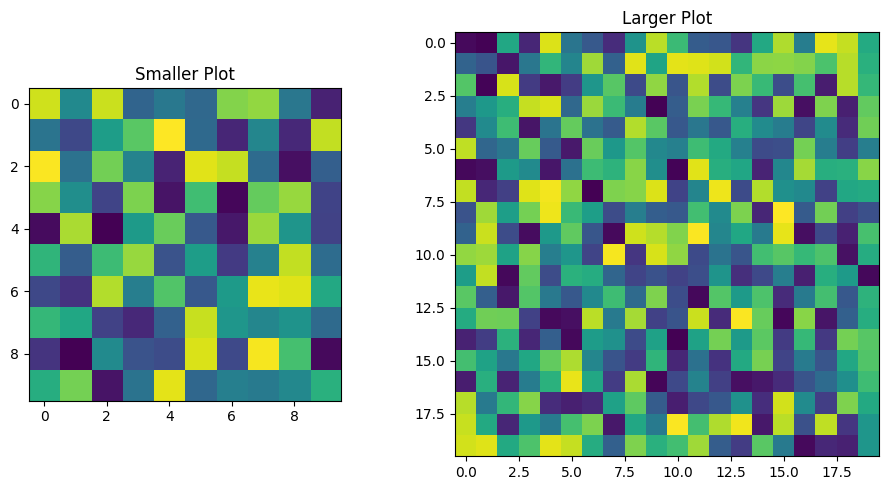

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Create some data to display
data1 = np.random.rand(10, 10)
data2 = np.random.rand(20, 20)

# Create a figure with two subplots with different sizes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5),
                               gridspec_kw={'width_ratios': [1, 2], 'height_ratios': [1]})

# Display data in the first subplot
im1 = ax1.imshow(data1)
ax1.set_title('Smaller Plot')

# Display data in the second subplot, which is larger due to the width_ratios argument
im2 = ax2.imshow(data2)
ax2.set_title('Larger Plot')

# Automatically adjust subplot parameters to give specified padding
plt.tight_layout()
plt.show()


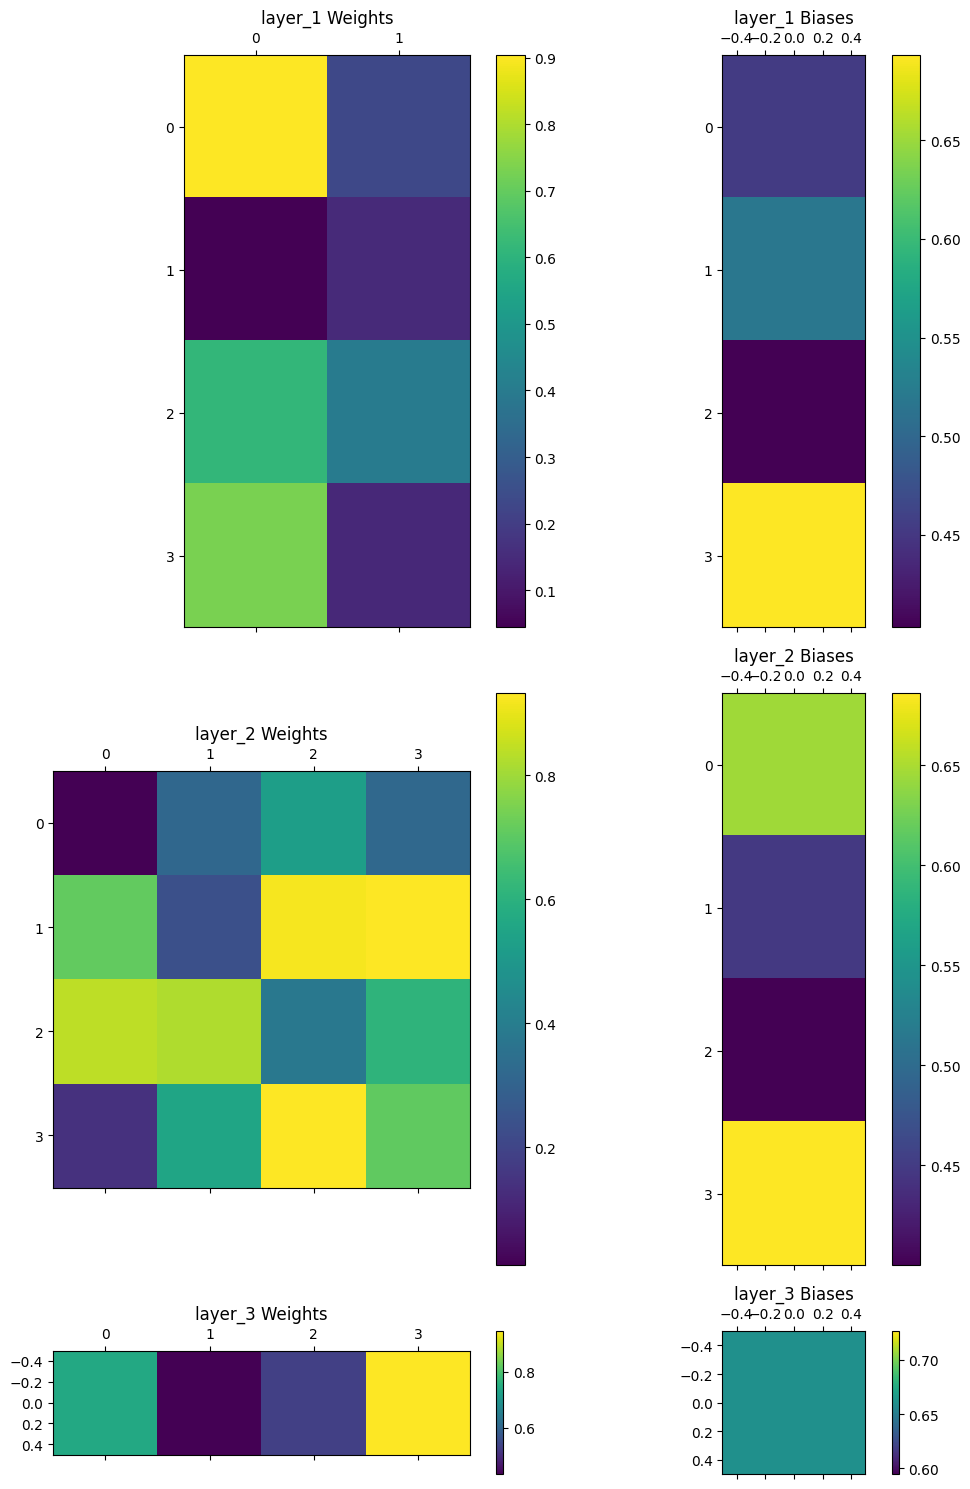

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming state_dict is a dictionary with keys 'layer_x.weights', 'layer_x.biases'
# For the sake of example, let's create dummy tensors with the correct shapes
state_dict = {
    'layer_1.weights': np.random.rand(4, 2),  # From 2 to 4 neurons
    'layer_1.biases': np.random.rand(4),
    'layer_2.weights': np.random.rand(4, 4),  # From 4 to 4 neurons
    'layer_2.biases': np.random.rand(4),
    'layer_3.weights': np.random.rand(1, 4),  # From 4 to 1 neuron
    'layer_3.biases': np.random.rand(1)
}

# Plotting
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 15),
                         gridspec_kw={'height_ratios': [4, 4, 1]})  # Adjust height ratios based on layer output size

for i, layer in enumerate(['layer_1', 'layer_2', 'layer_3']):
    weights = state_dict[f'{layer}.weights']
    biases = state_dict[f'{layer}.biases']
    
    # Plot weights matrix
    ax = axes[i, 0]
    cax = ax.matshow(weights, cmap='viridis')
    fig.colorbar(cax, ax=ax)
    ax.set_title(f'{layer} Weights')
    
    # Plot biases vector as a 2D array for consistent visualization
    ax = axes[i, 1]
    cax = ax.matshow(biases.reshape(-1, 1), cmap='viridis')
    fig.colorbar(cax, ax=ax)
    ax.set_title(f'{layer} Biases')

plt.tight_layout()
plt.show()
